# **About Dataset**
## **Data Description**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Features:
```
01. Male            | Male or Female        ( binary: “1”, means “Yes”, “0” means “No” )                             |
02. Age             | Age of the patient                                                                             |
03. Cigs Per Day    | The number of cigarettes that the person smoked on average in one day                          |
04. BP Meds         | Whether or not the patient as on blood pressure medication                                     |
05. PrevalentStroke | Whether or not the patient had previously had a stroke                                         |
06. Prevalent Hyp   | Whether or not the patient was hypertensive                                                    |
07. Diabetes        | Whether or not the patient had diabetes                                                        |
08. Tot Chol        | Total cholesterol level                                                                        |
09. Sys BP          | Systolic blood pressure                                                                        |
10. Dia BP          | Diastolic blood pressure                                                                       |
11. BMI             | Body Mass Index                                                                                |
12. Heart Rate      | Heart rate                                                                                     |
13. Glucose         | Glucose level                                                                                  |
14. TenYearCHD      | 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - TARGET |

```

---


All of the dataset values were collected at the moment of medical examination.



---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

df_master=pd.read_csv("./framingham_heart_disease.csv")
df=df_master.copy()

In [2]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
#Number of (Rows , Columns)
df.shape

(4240, 16)

In [4]:
#Information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
#Description about DataFrame
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Counting total number of Null Values in particular row
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#Correlation with every attributes
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


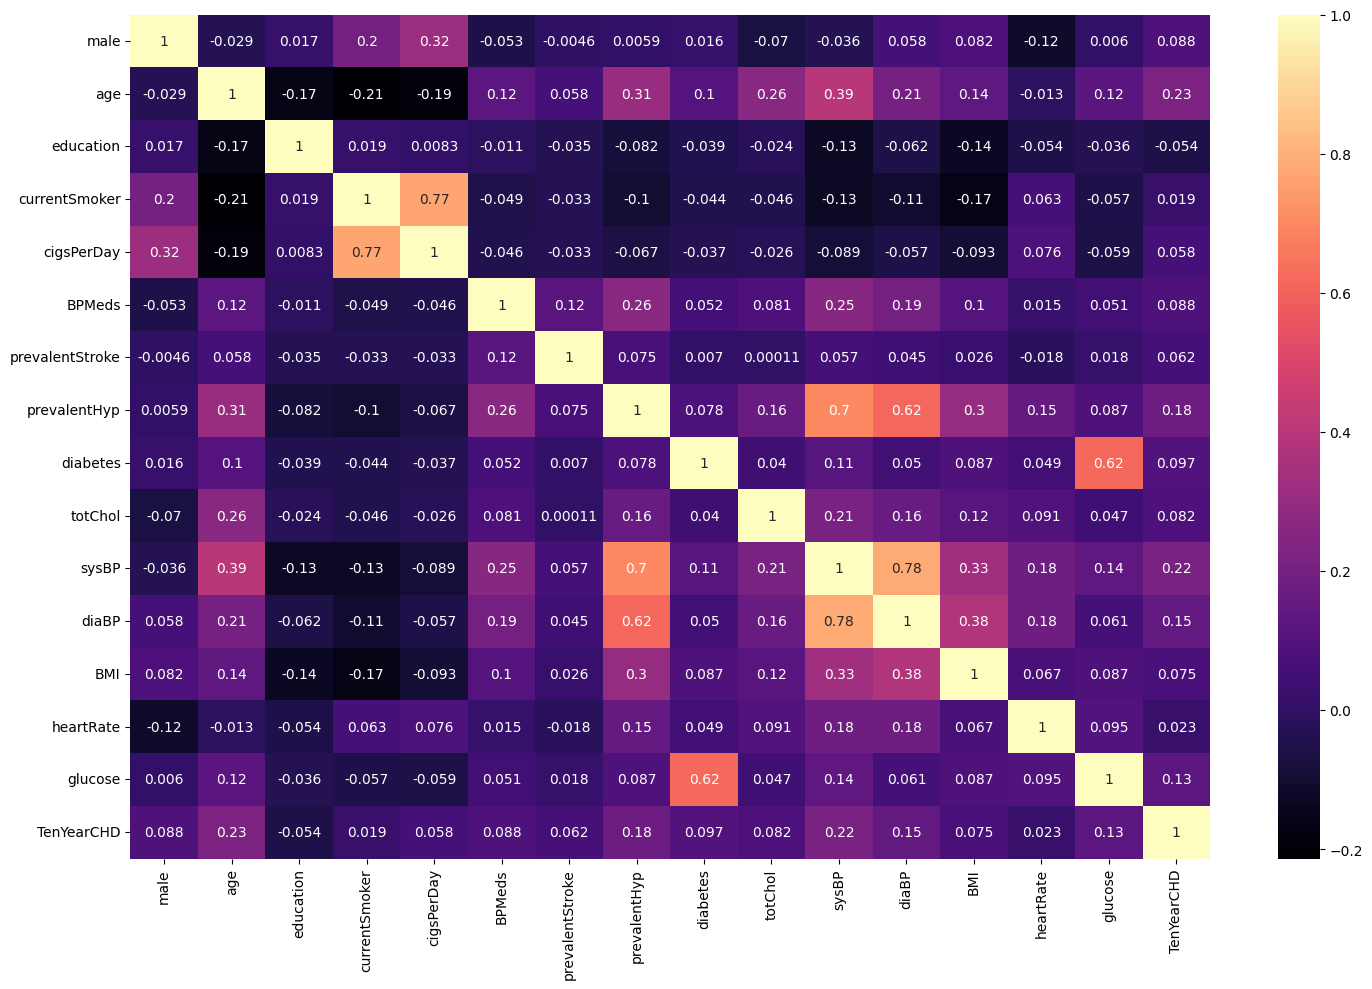

In [8]:
#Heatmap of the Correlation Values
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="magma", annot = True, annot_kws = {"size":10})
plt.tight_layout()

<Axes: >

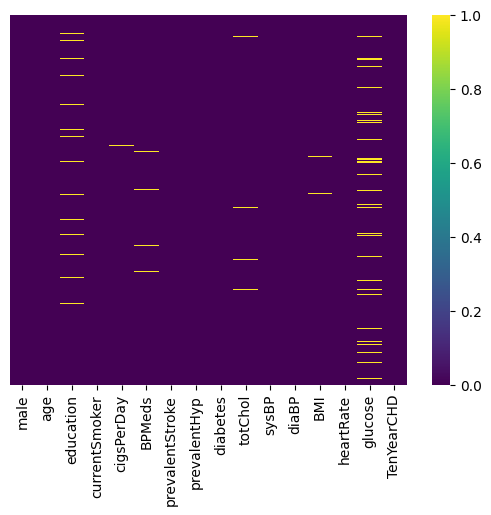

In [9]:
#Heatmap of Null Values
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

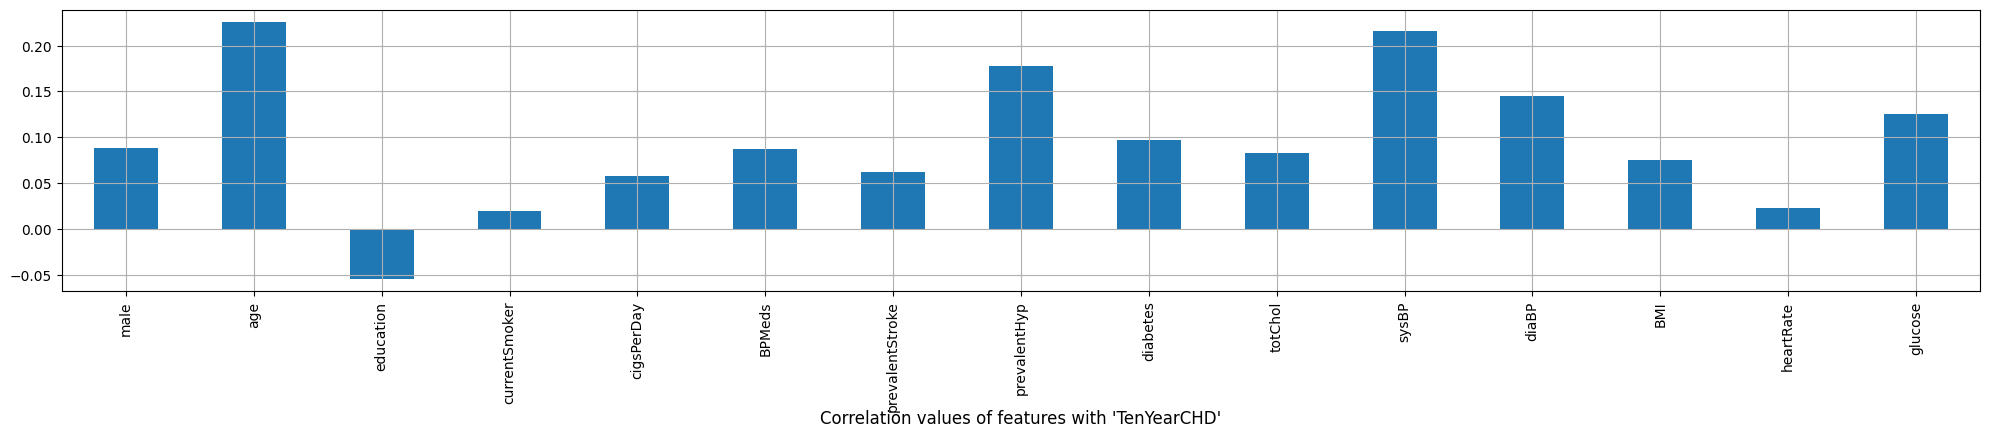

In [10]:
#Correlation values of every columns with 'TenYearCHD'(Target Value)
plt.figure(figsize=(20,5))
df.drop('TenYearCHD', axis=1,inplace=False).corrwith(df.TenYearCHD).plot(kind='bar',grid=True)
plt.title("Correlation values of features with 'TenYearCHD'",y=-0.5)
plt.tight_layout()

Text(0.5, -0.3, 'Male and female Count')

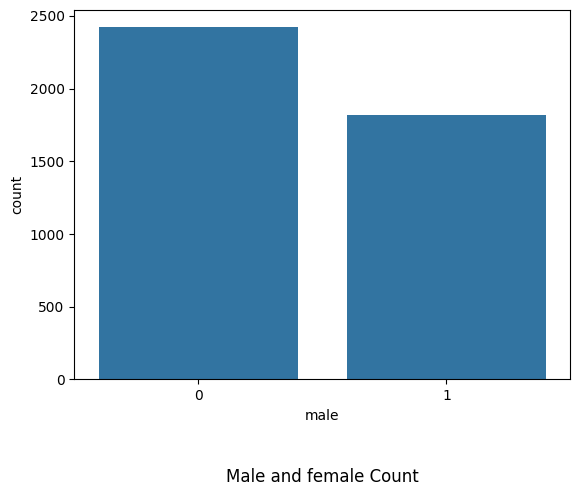

In [11]:
#Total count of people
sns.countplot(x=df.male)
plt.title("Male and female Count",y=-0.3)

Text(0.5, -0.3, 'Gender vs TenYearCHD')

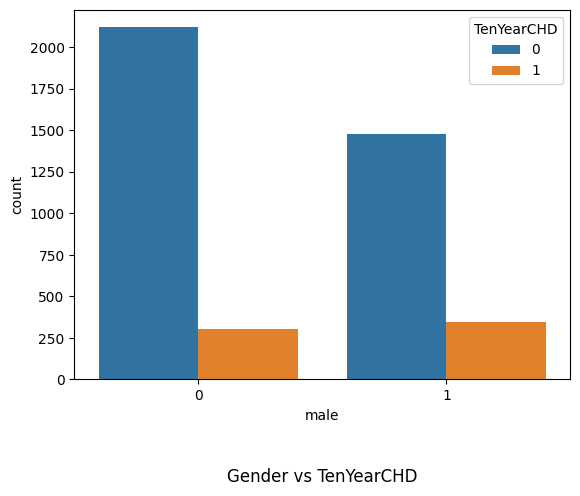

In [12]:
#Count of Male and Female having TenYearCHD or not
sns.countplot(x=df.male,hue=df.TenYearCHD)
plt.title("Gender vs TenYearCHD",y=-0.3)

In [13]:
#Percentage of Female having TenYearCHD in Framingham

femaleCHD = df[ (df["male"]==0) & (df["TenYearCHD"]==1)].shape[0]
print("Total number of Female having TenYearCHD:",femaleCHD)

tot = df["male"].shape[0]
print("Total number of people in Framington:",tot)

femaleCHDpercent = ( femaleCHD/tot )*100
print("Percentage of Female having Heart Disease", femaleCHDpercent)


Total number of Female having TenYearCHD: 301
Total number of people in Framington: 4240
Percentage of Female having Heart Disease 7.099056603773585


In [14]:
#Percentage of Male having TenYearCHD in Framingham

maleCHD = df[ (df["male"]==1) & (df["TenYearCHD"]==1)].shape[0]
print("Total number of Male having TenYearCHD:",maleCHD)

tot = df["male"].shape[0]
print("Total number of people in Framington:",tot)

maleCHDpercent = ( maleCHD/tot )*100
print("Percentage of Female having Heart Disease", maleCHDpercent)

Total number of Male having TenYearCHD: 343
Total number of people in Framington: 4240
Percentage of Female having Heart Disease 8.089622641509434


Text(0.5, -0.3, 'Count of types of education')

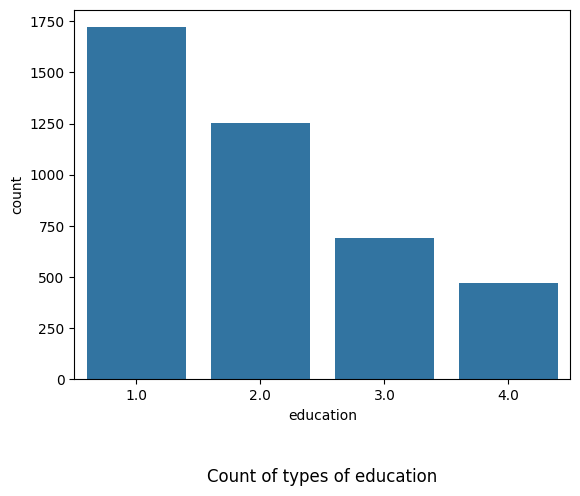

In [15]:
#Count of levels of education 
sns.countplot(x=df.education)
plt.title("Count of types of education",y=-0.3)

In [16]:
#Correlation of Education with every columns
df.corr().education

male               0.017415
age               -0.166356
education          1.000000
currentSmoker      0.018528
cigsPerDay         0.008323
BPMeds            -0.010898
prevalentStroke   -0.035142
prevalentHyp      -0.081726
diabetes          -0.038749
totChol           -0.023613
sysBP             -0.129496
diaBP             -0.061919
BMI               -0.137747
heartRate         -0.054182
glucose           -0.035843
TenYearCHD        -0.054248
Name: education, dtype: float64

In [17]:
#Number of male
x = df['male'].value_counts()
print(x)
print("0 = Female ")
print("1 = Male ")

male
0    2420
1    1820
Name: count, dtype: int64
0 = Female 
1 = Male 


In [18]:
#Dropping columns not required
df.drop(columns=['education','currentSmoker','heartRate'],inplace=True)

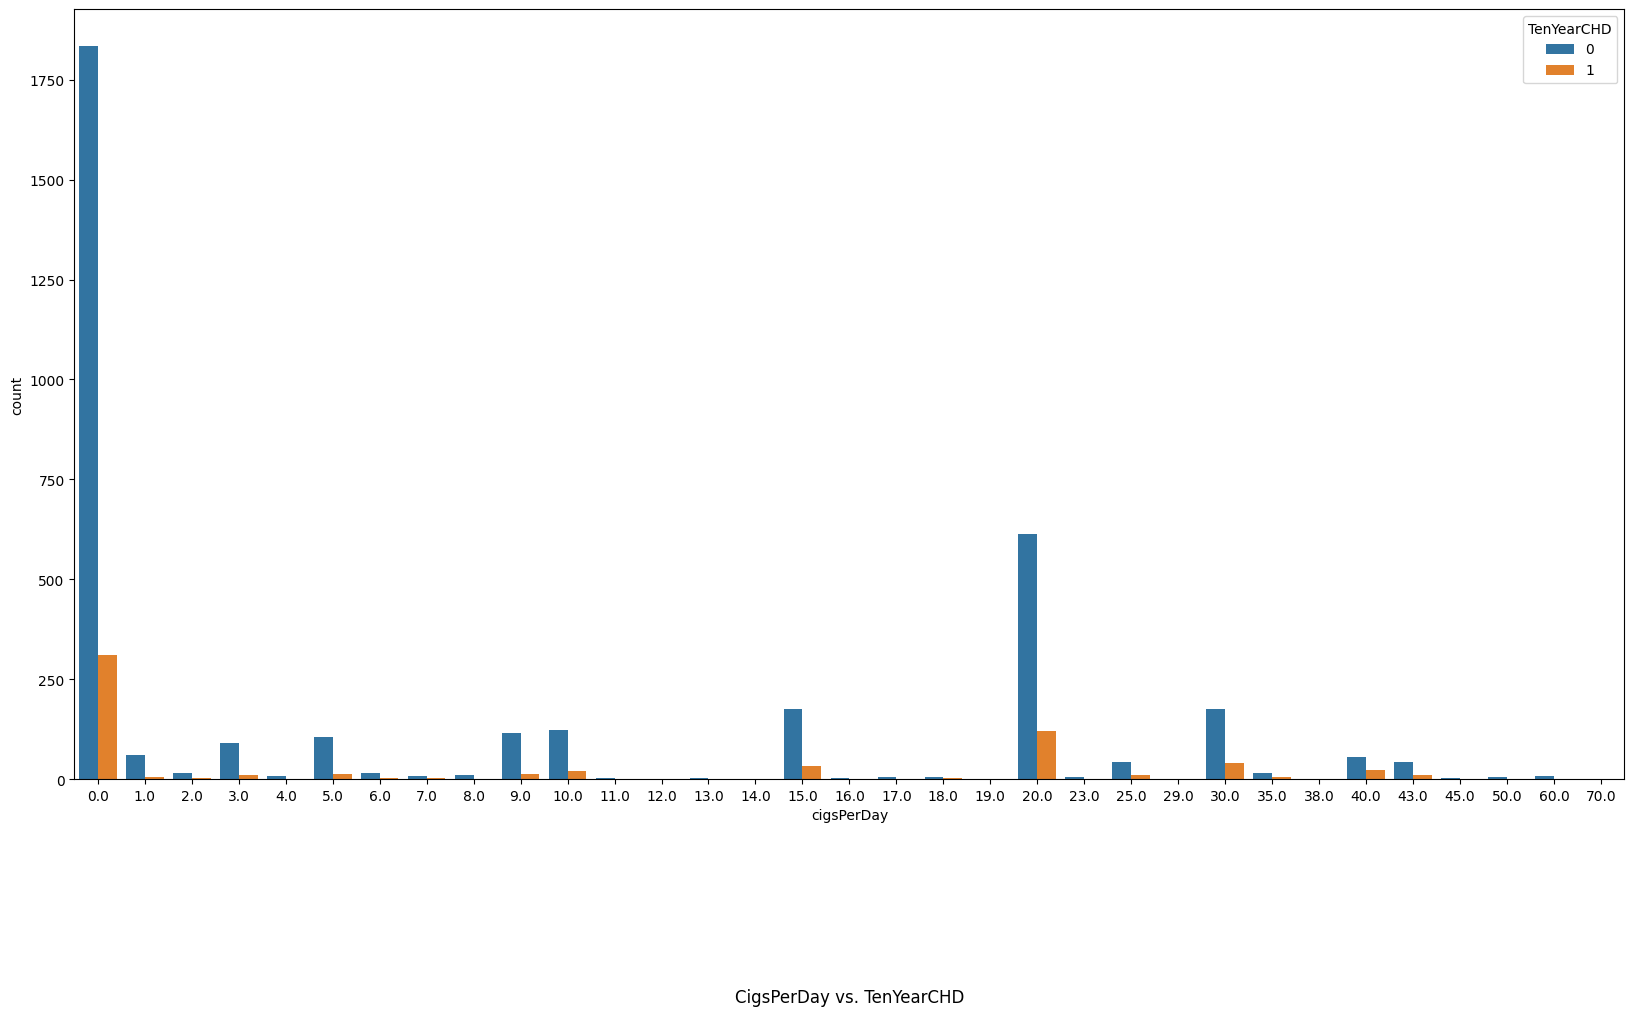

In [19]:
# plot fot TenYearCHD vs. CigsPerDay
plt.figure(figsize=(20,10))
sns.countplot(x=df.cigsPerDay,hue=df.TenYearCHD)
plt.title("CigsPerDay vs. TenYearCHD",y=-0.3)
plt.show()

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\2246859614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.age,palette='gist_earth')


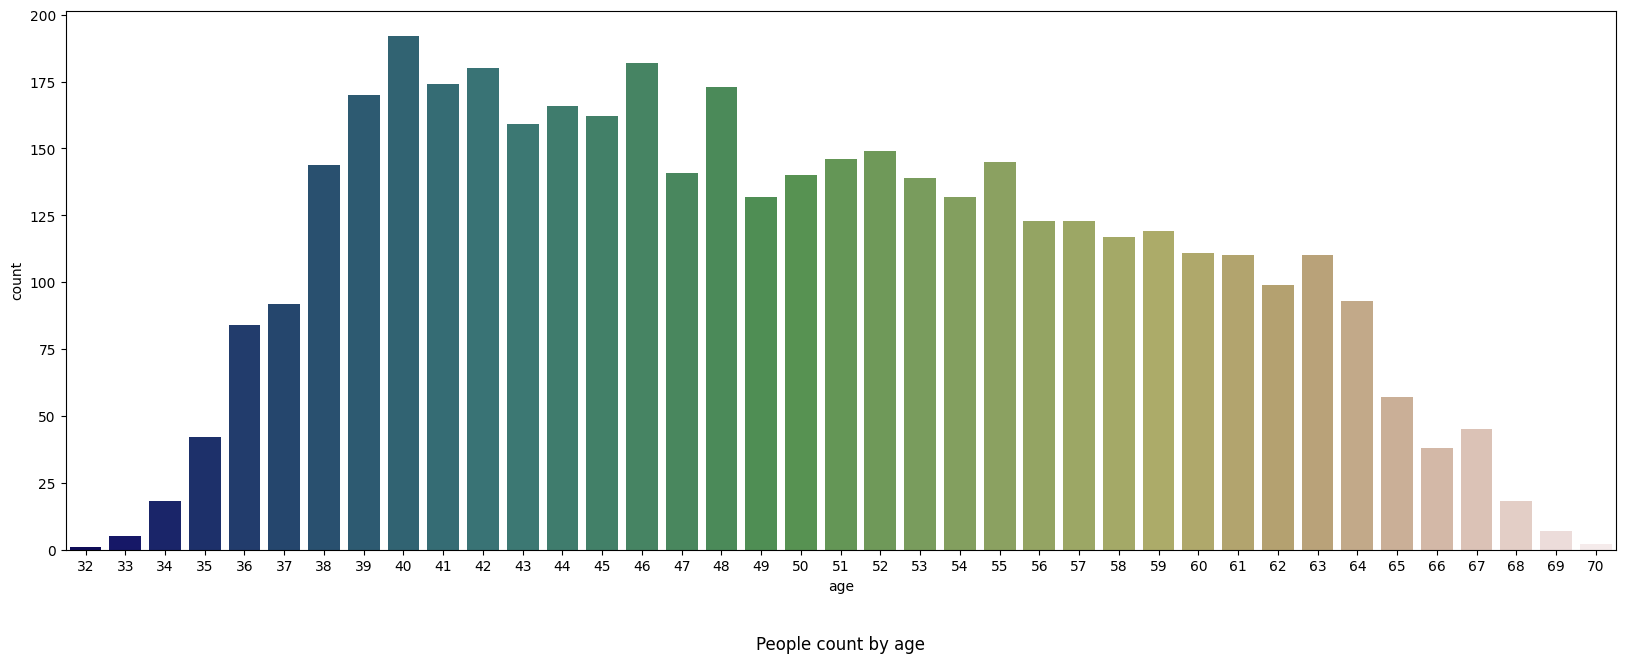

In [20]:
#count by age
plt.figure(figsize=(20,7))
sns.countplot(x=df.age,palette='gist_earth')
plt.title('People count by age',y=-0.2);

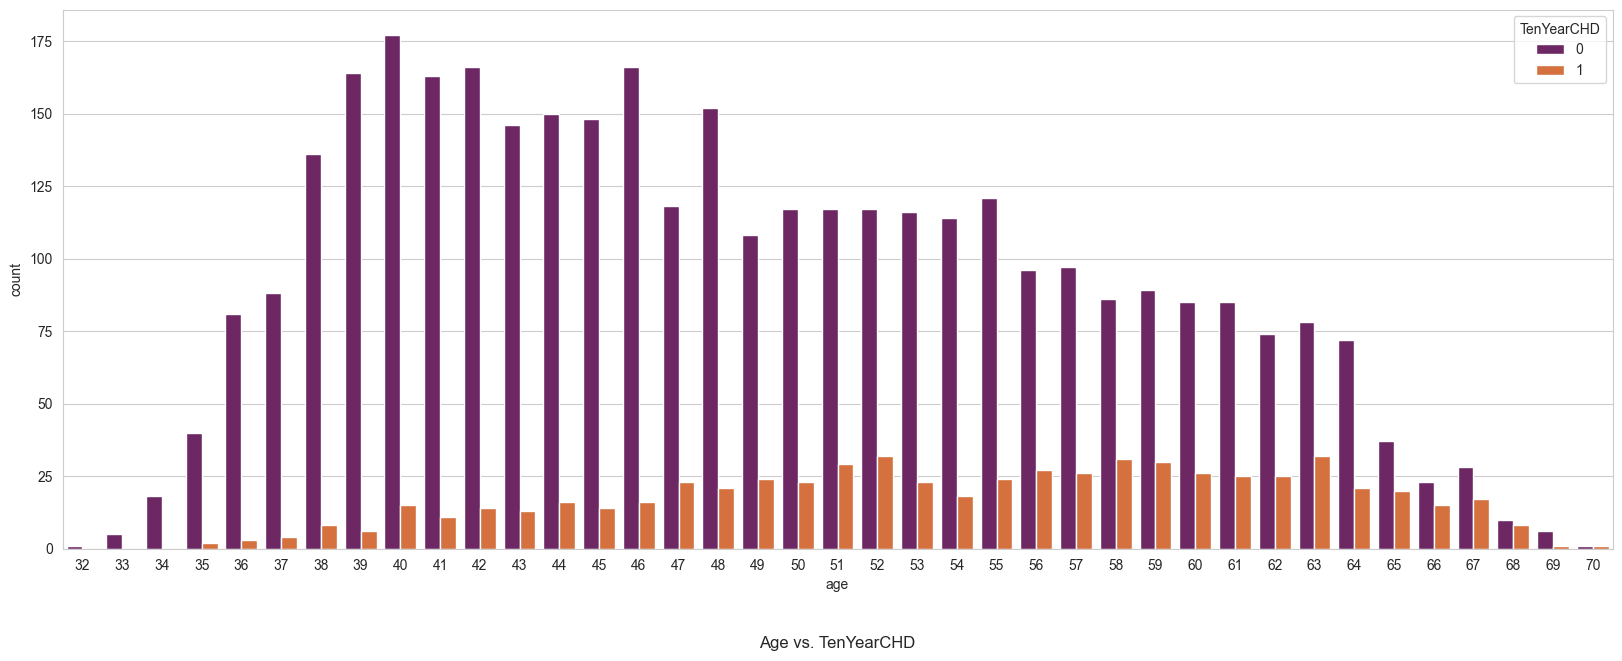

In [21]:
#age vs TenYearCHD
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x = df.age ,hue=df.TenYearCHD, palette = 'inferno')
plt.title("Age vs. TenYearCHD",y=-0.2)
plt.show()


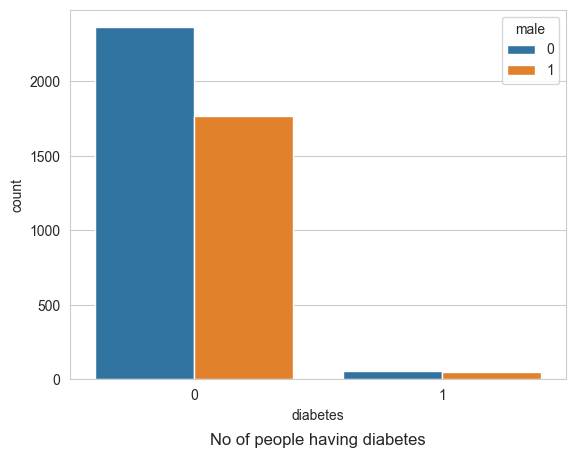

In [22]:
#Count of people having diabetes vs. TenYearCHD
sns.countplot(x=df.diabetes,hue=df.male)
plt.title("No of people having diabetes",y=-0.2)
plt.show()

In [23]:
#count of poeple having diabetes
df[df.diabetes==1].diabetes.count()

109

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\2667232183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df.TenYearCHD, y = df.totChol[0:100], palette='magma')


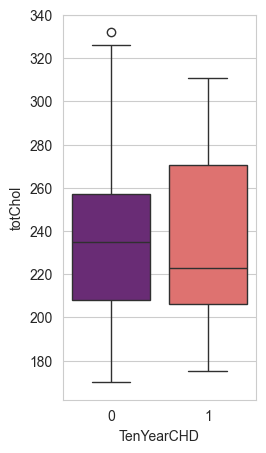

In [24]:
#Bar plot of TenYearCHD vs totChol 
plt.figure(figsize=(2.5,5))
sns.boxplot(x= df.TenYearCHD, y = df.totChol[0:100], palette='magma')
plt.show()

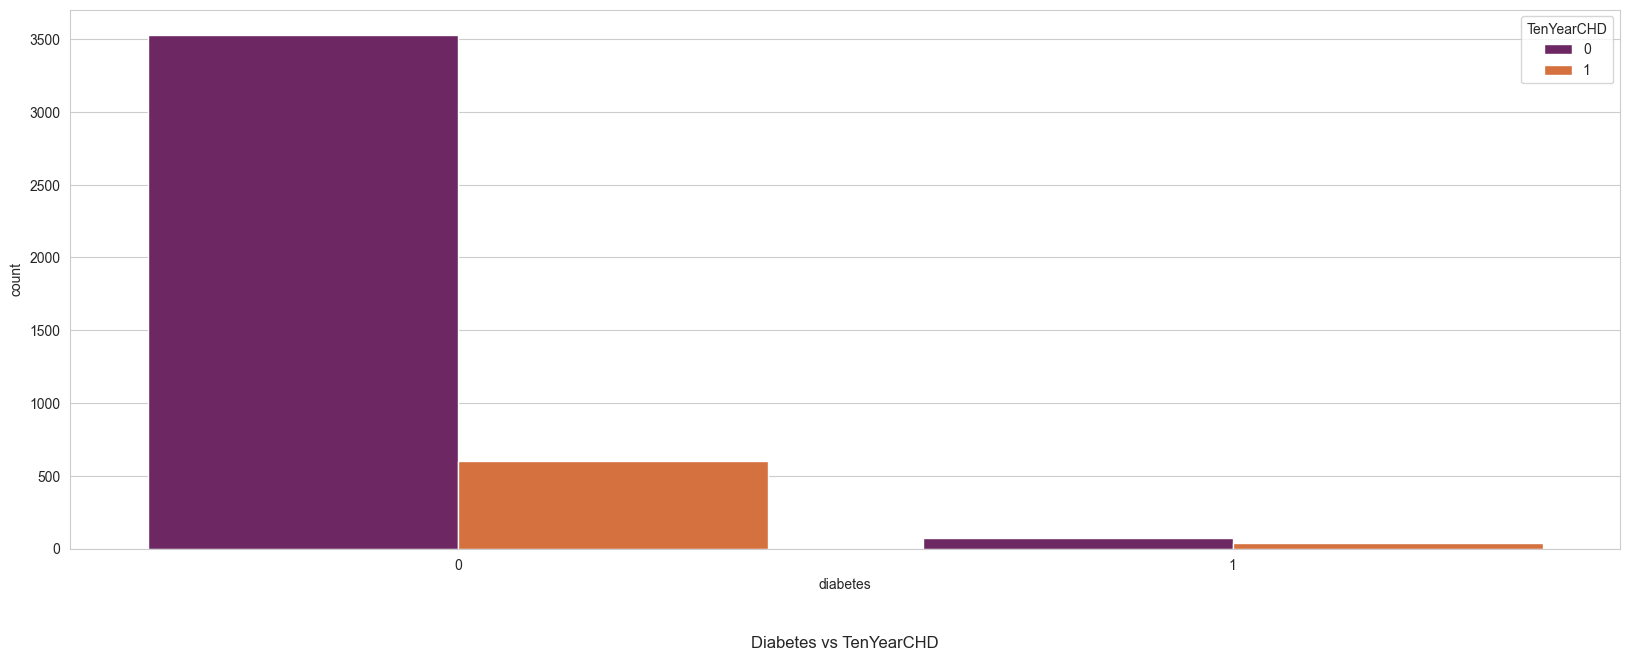

In [25]:
#Diabetes vs. TenYearCHD
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x = df.diabetes ,hue=df.TenYearCHD, palette = 'inferno')
plt.title("Diabetes vs TenYearCHD",y=-0.2)
plt.show()

In [26]:
#Count of unique values in every column
for i in df.columns:
    print(i,len(df[i].unique()))

male 2
age 39
cigsPerDay 34
BPMeds 3
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 249
sysBP 234
diaBP 146
BMI 1365
glucose 144
TenYearCHD 2


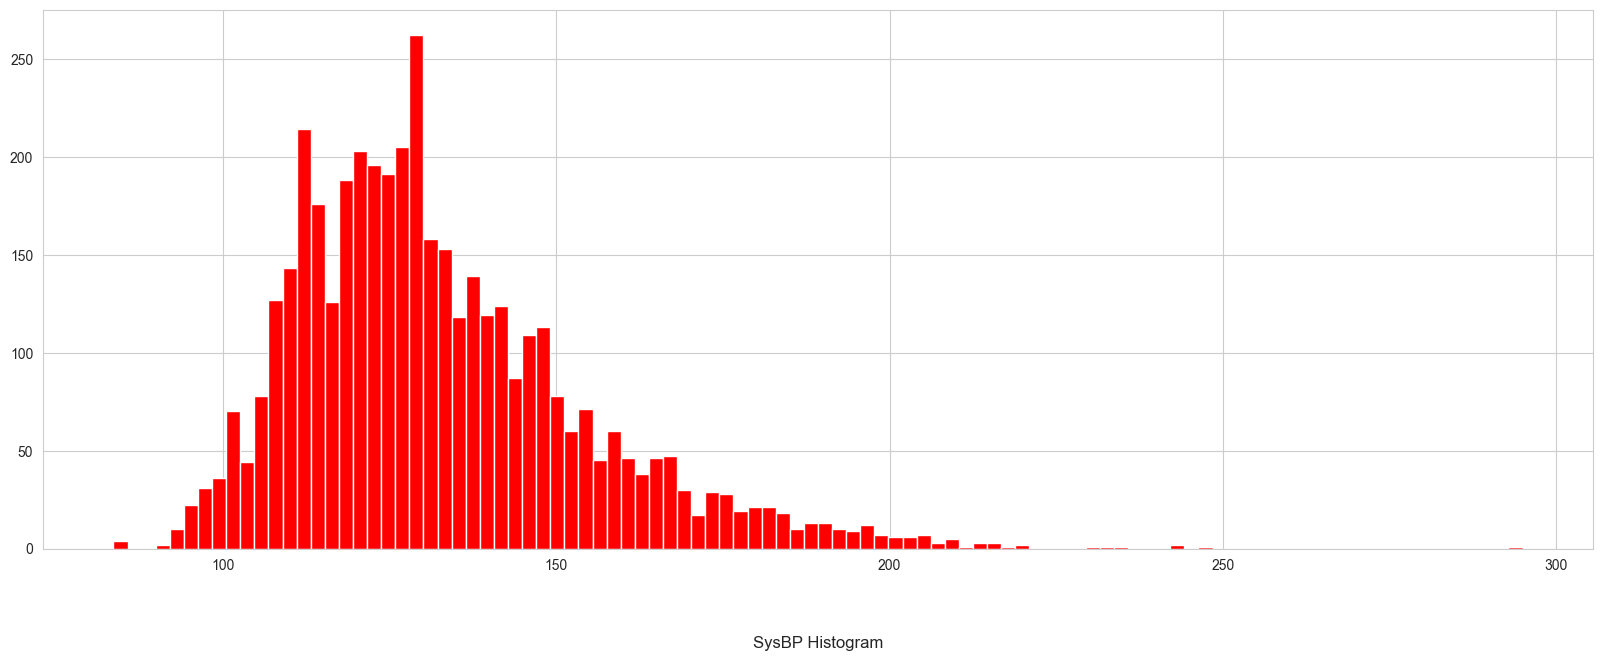

In [27]:
#Histogram for sysBP
df['sysBP'].hist(color='red',bins=100,figsize=(20,7))
plt.title("SysBP Histogram",y=-0.2)
plt.show()

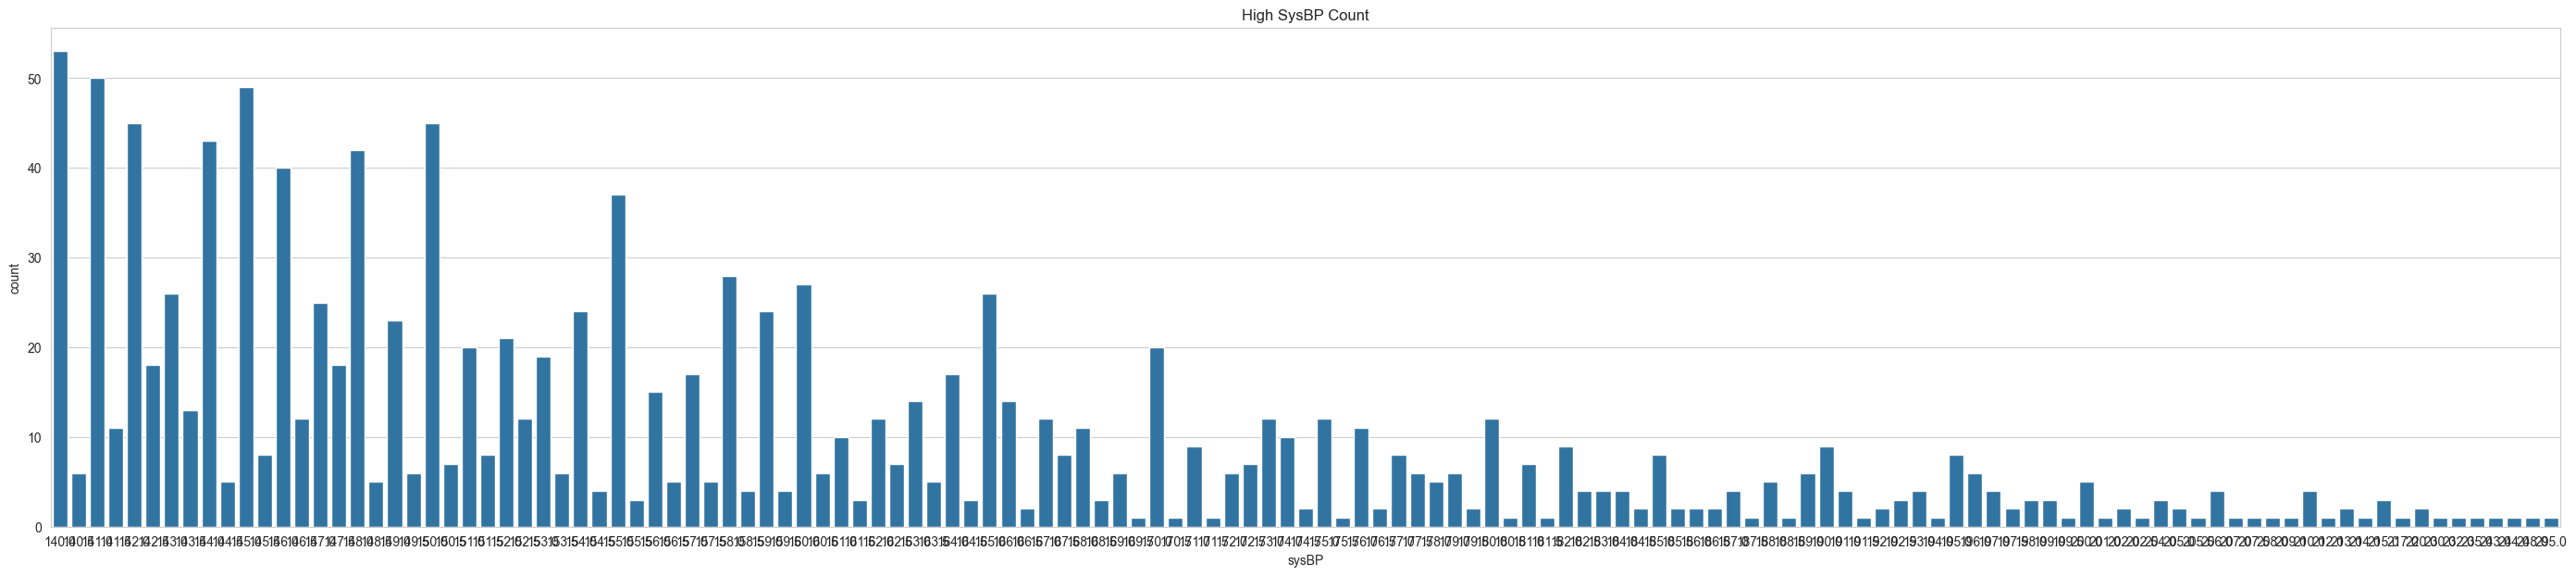

In [28]:
#High SysBP Count
plt.figure(figsize=(35,7))
dfHighBp = df[df.sysBP>=140]
dfHighBp
plt.title("High SysBP Count")
sns.countplot(x=dfHighBp.sysBP)
plt.show()

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\1929373956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dfNBp.sysBP,palette='magma')


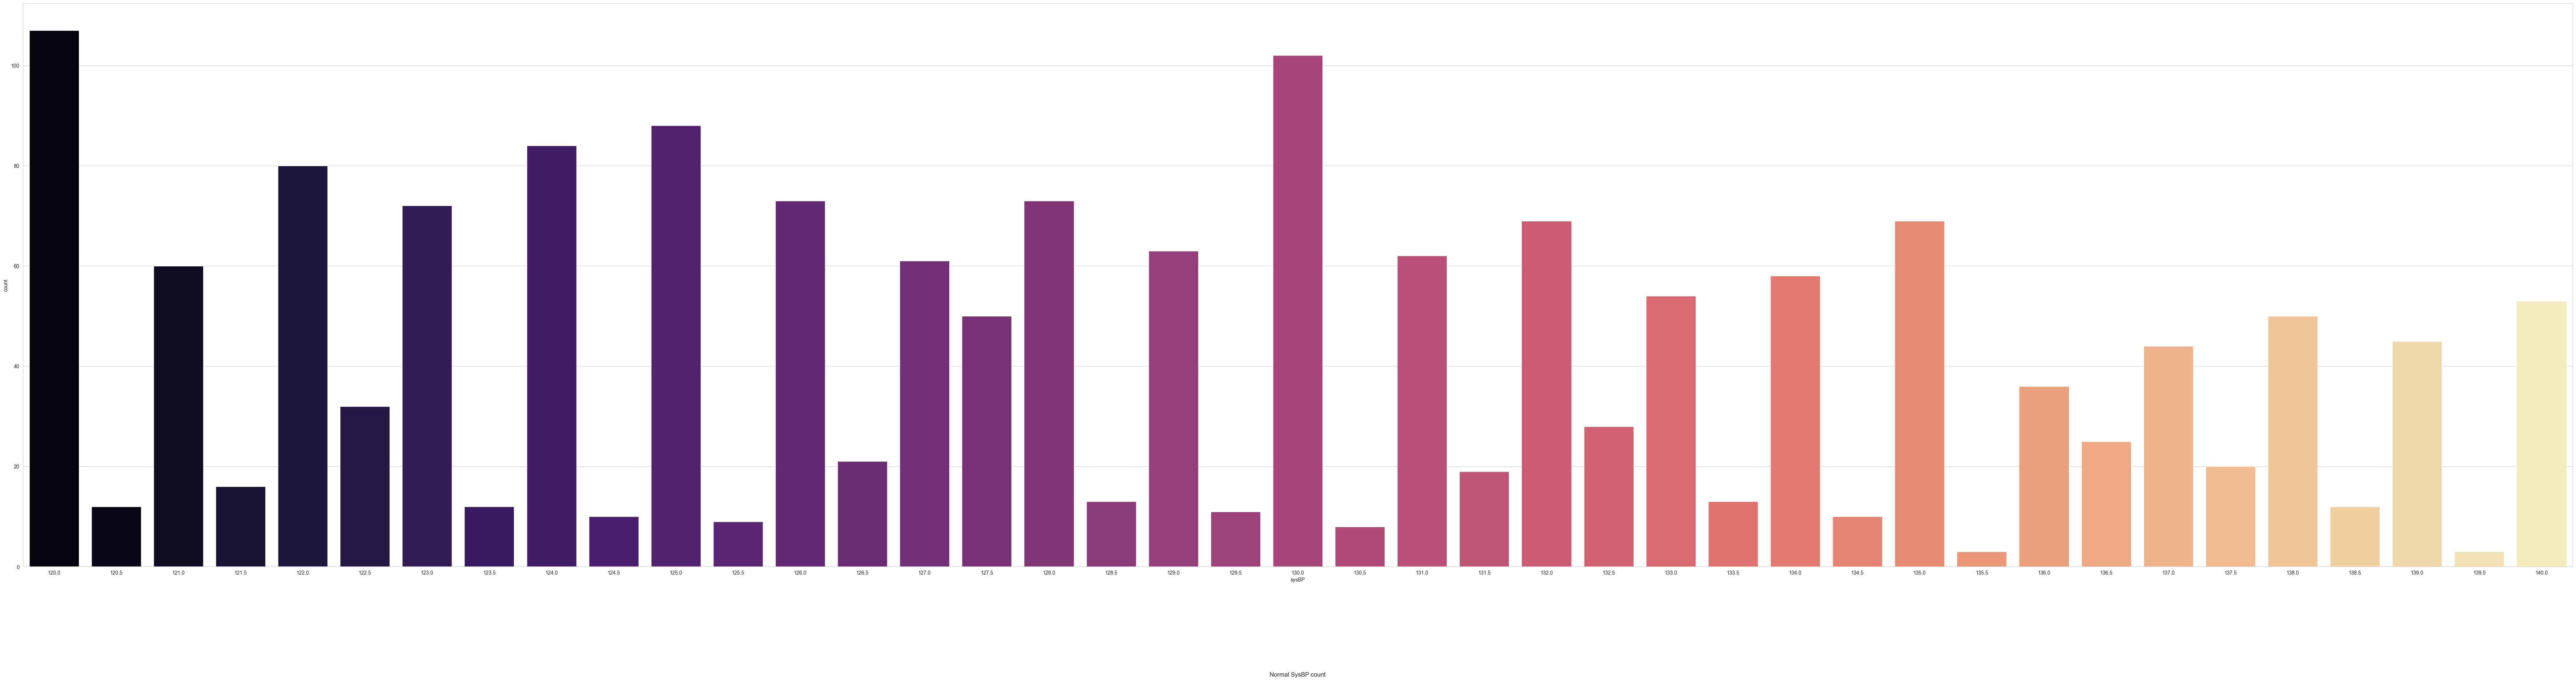

In [29]:
#Normal SysBp Count
plt.figure(figsize=(90, 20))
dfNBp = df[(df.sysBP>=120)&(df.sysBP<=140)]
dfNBp

sns.countplot(x=dfNBp.sysBP,palette='magma')
plt.title("Normal SysBP count",y=-0.2)
plt.show()

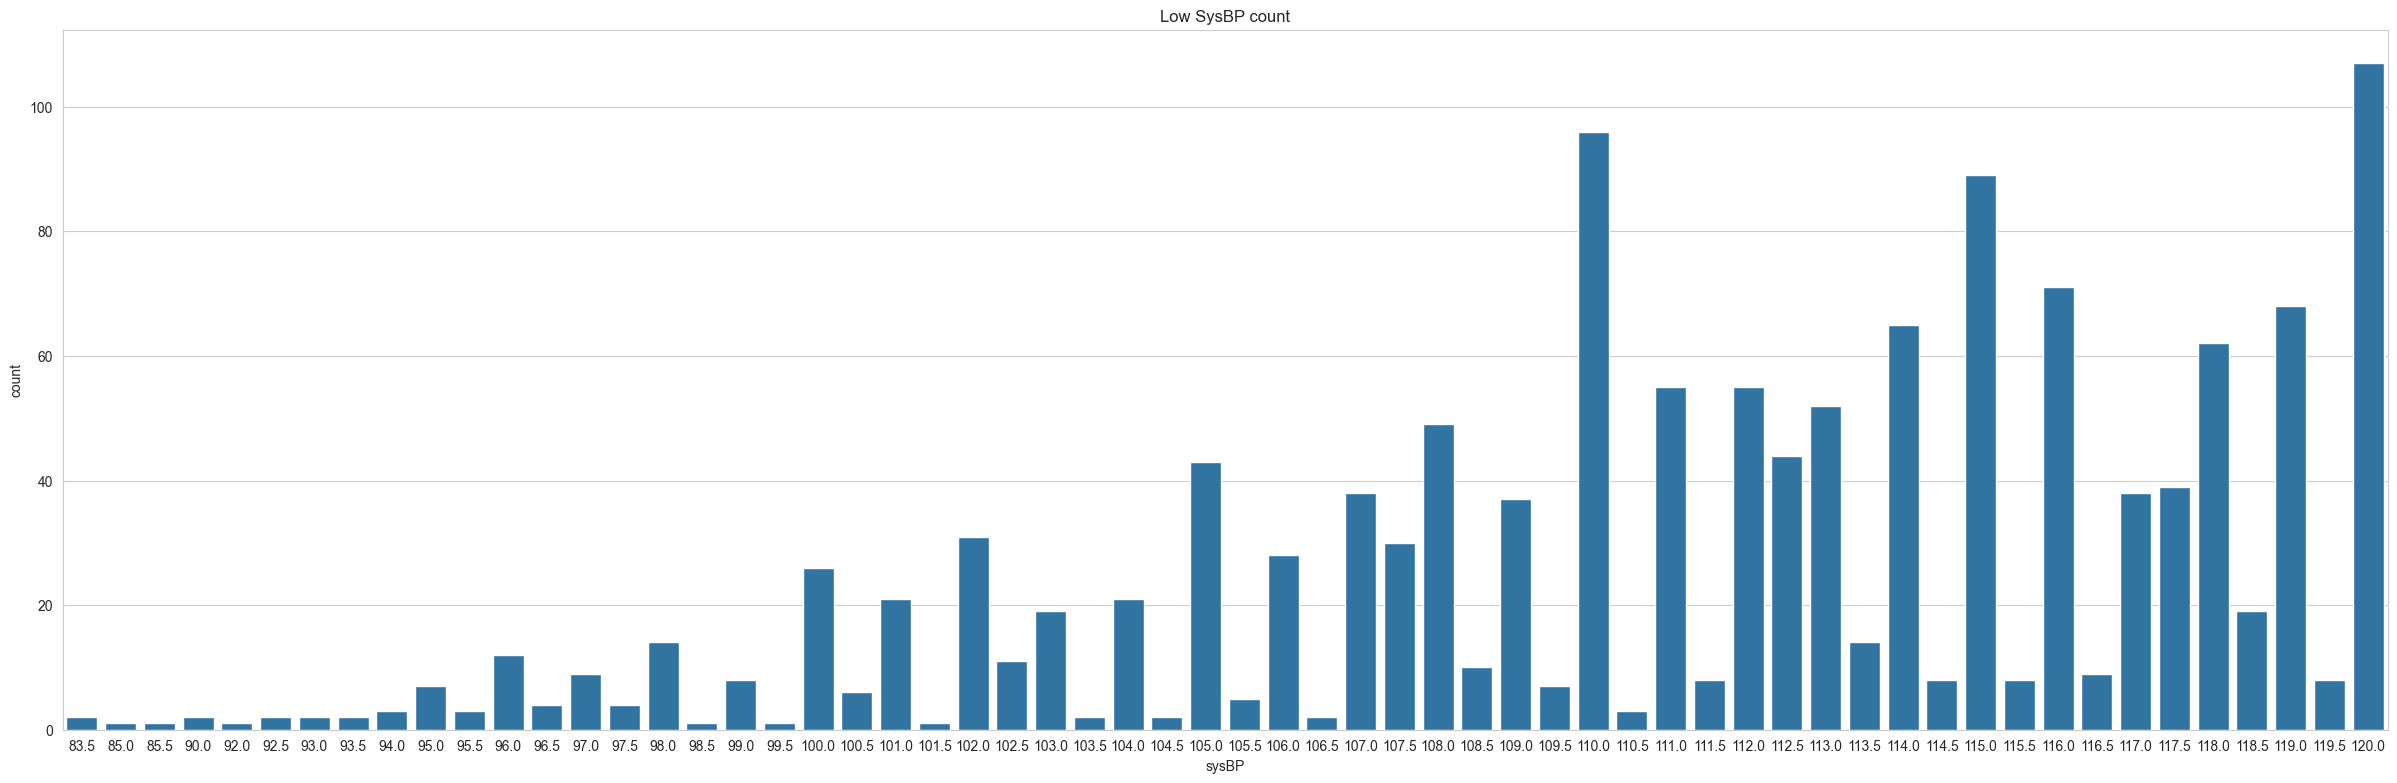

In [30]:
#Low SysBP Count
plt.figure(figsize=(30, 20))
dfLowBp = df[df.sysBP<=120]
dfLowBp
plt.subplot(2,1,1)
sns.countplot(x=dfLowBp.sysBP)
plt.title("Low SysBP count")
plt.show()

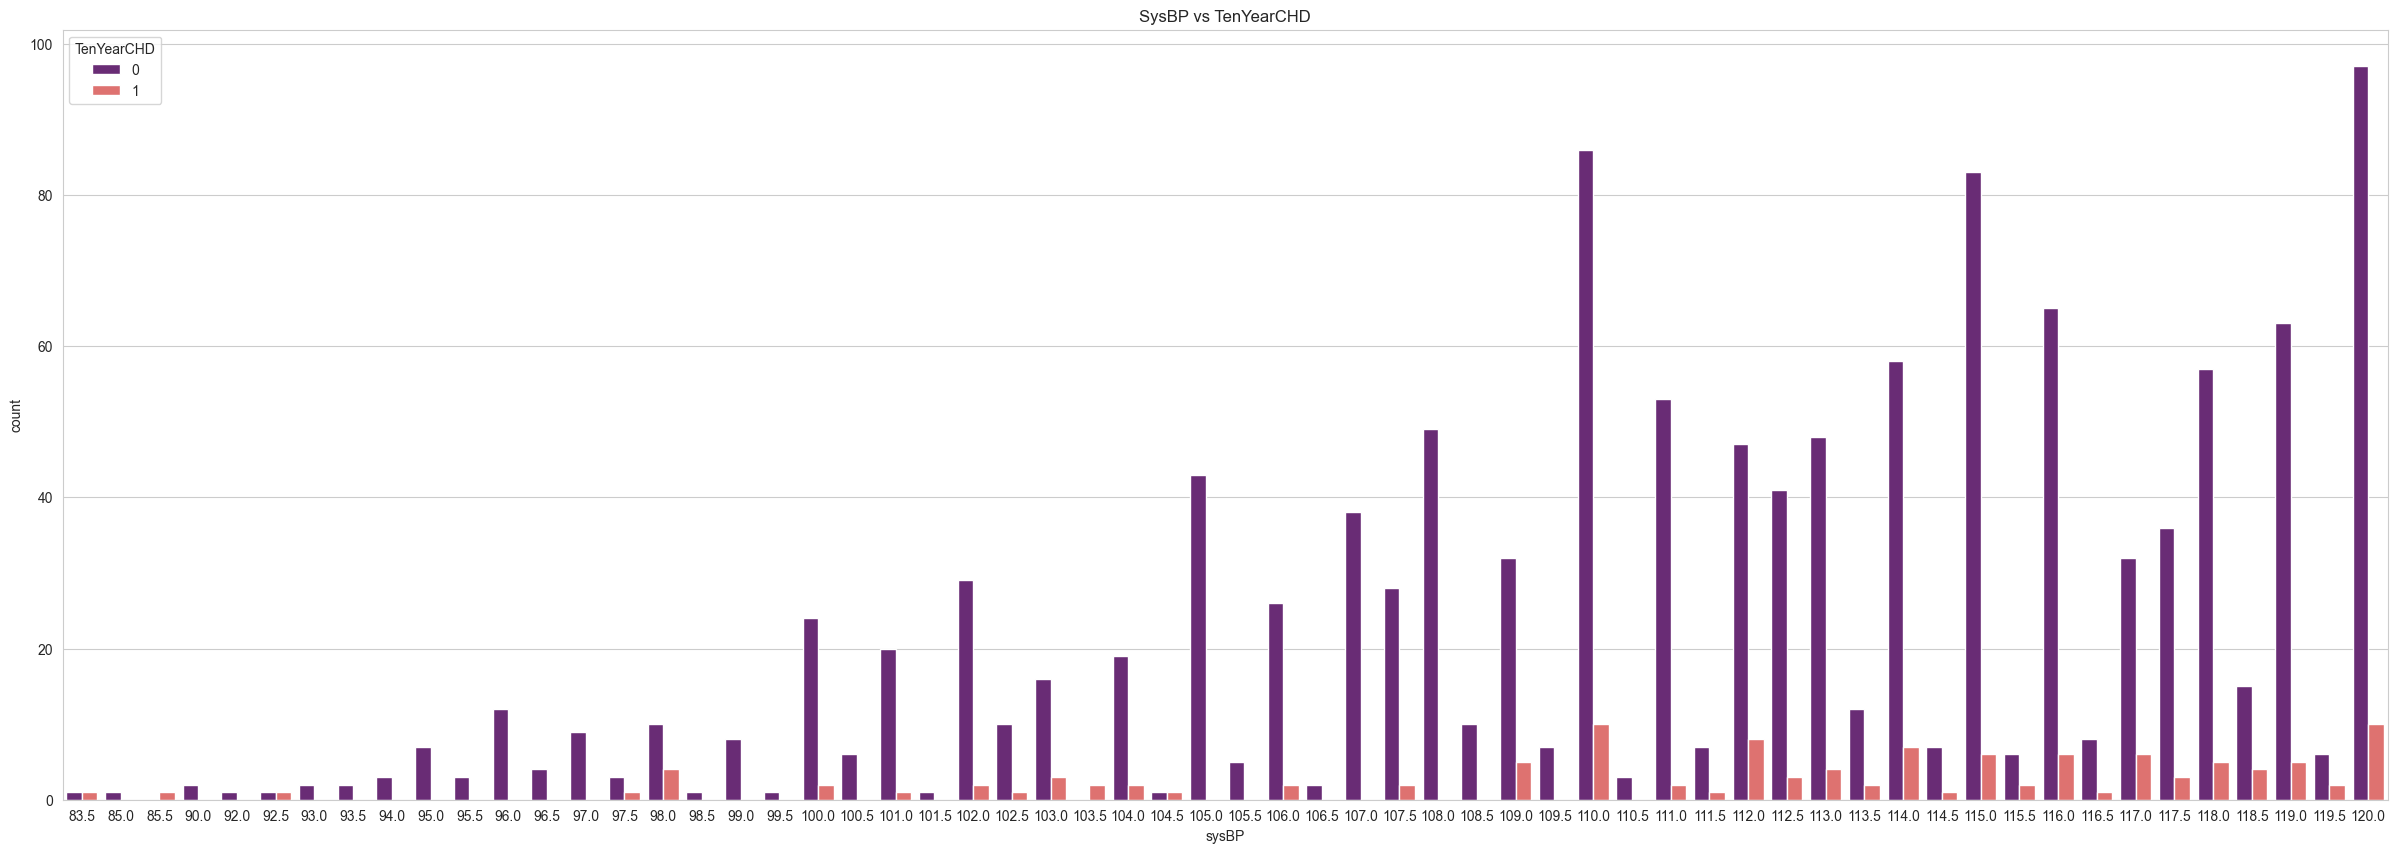

In [31]:
#Low SysBP vs TenYearCHD
plt.figure(figsize=(30, 10))
sns.countplot(x=dfLowBp.sysBP, hue=df.TenYearCHD, palette='magma')
plt.title("SysBP vs TenYearCHD")
plt.show()

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\3008375588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dfHighBp.diaBP, palette='hsv')


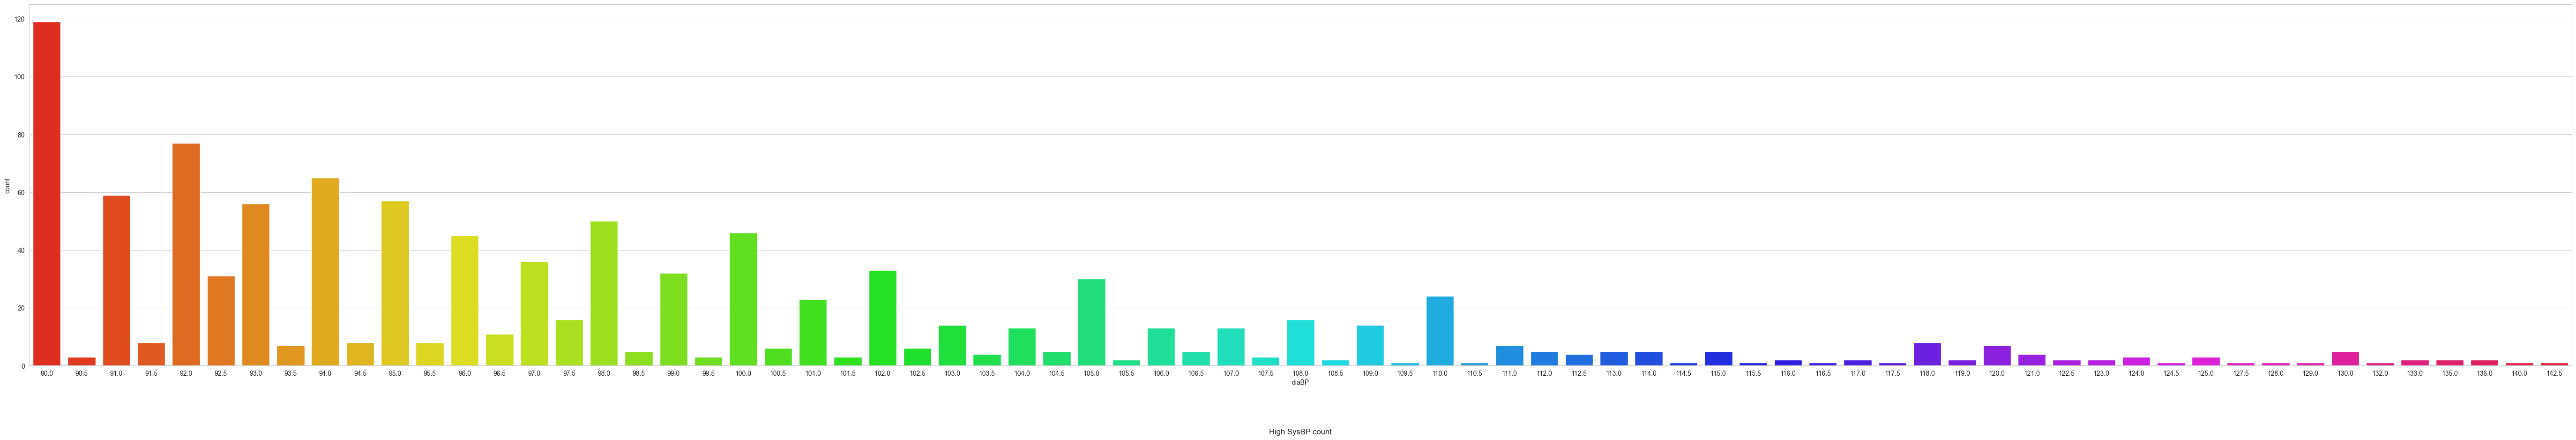

In [32]:
#High DiaBP Count
plt.figure(figsize=(70,10))
dfHighBp = df[df.diaBP>=90]
dfHighBp
sns.countplot(x=dfHighBp.diaBP, palette='hsv')
plt.title("High SysBP count",y=-0.2)
plt.show()

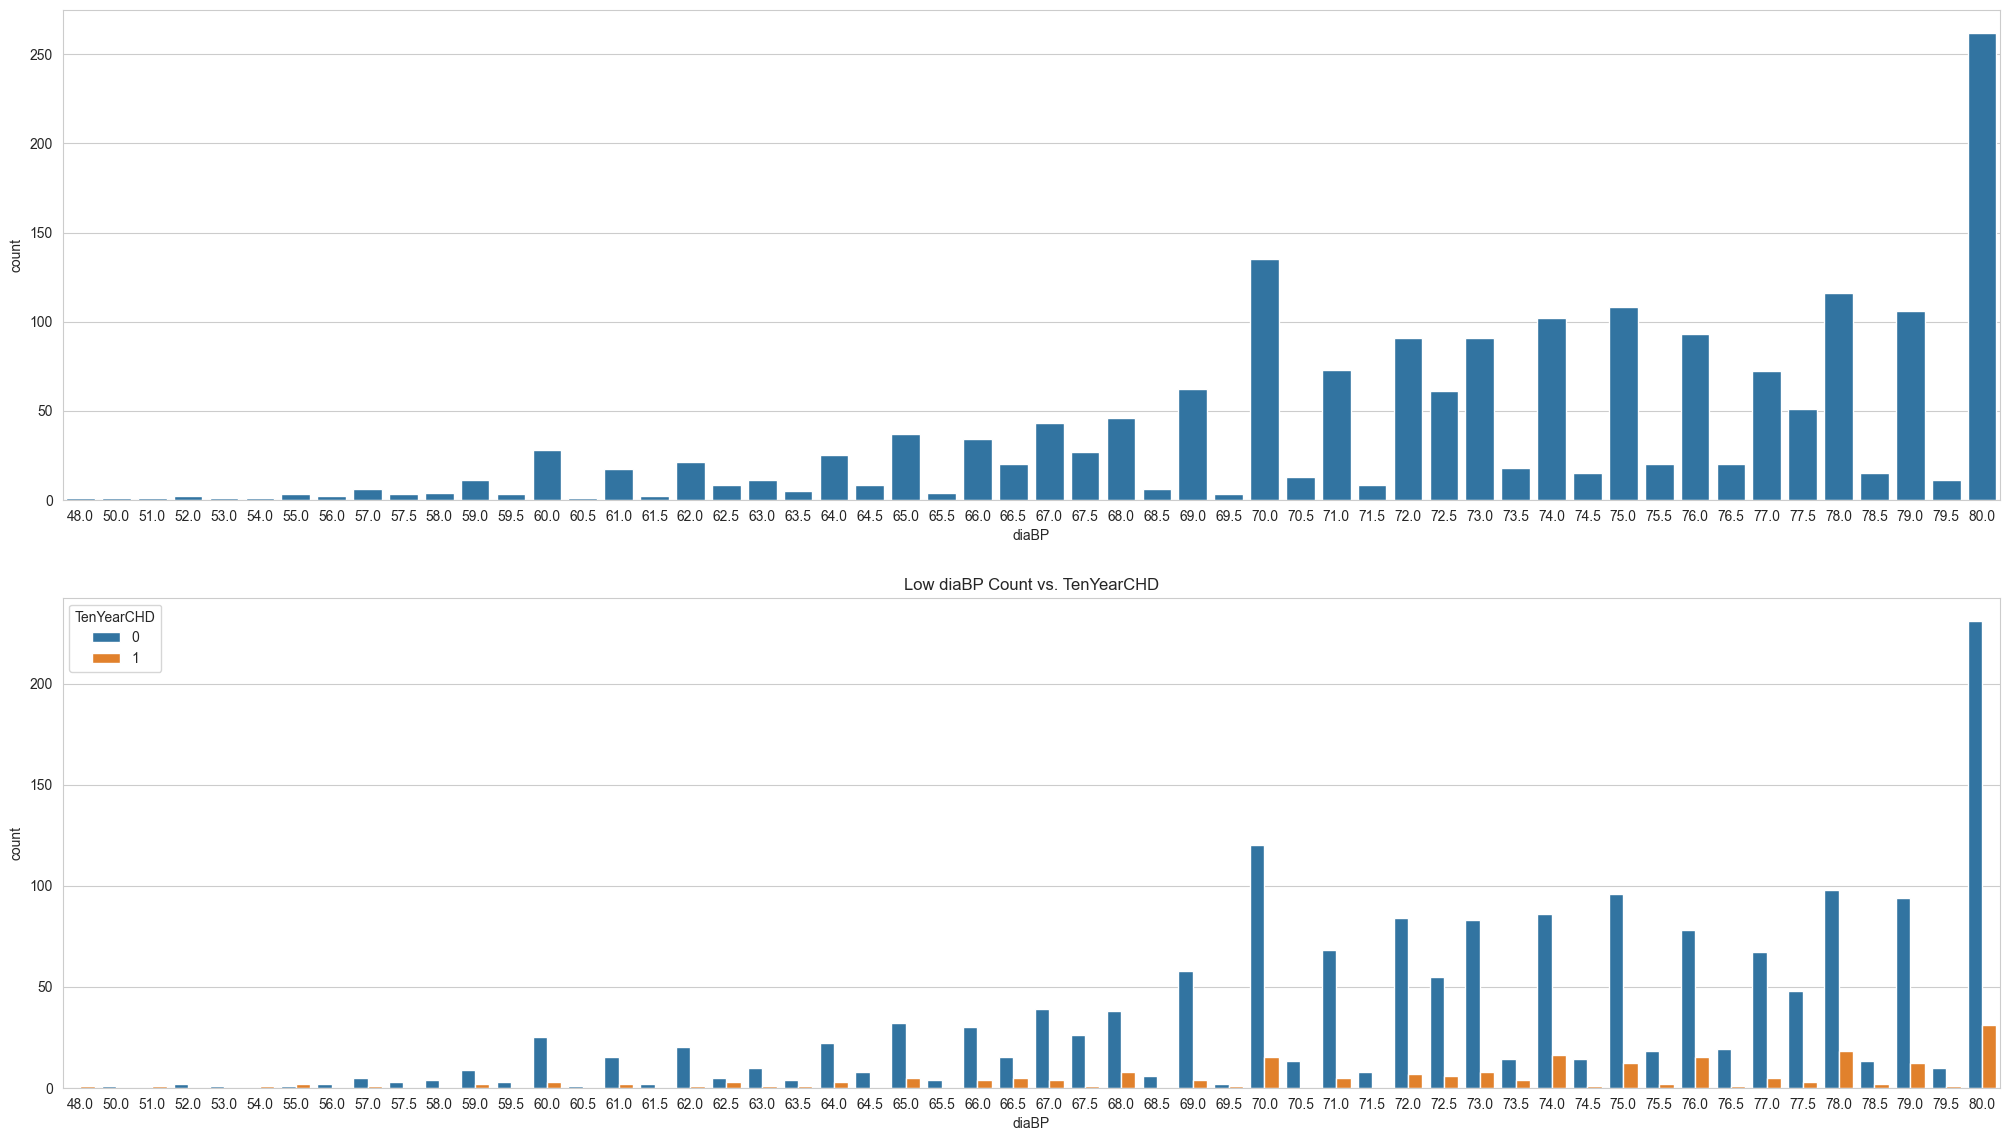

In [33]:
#Low DiaBP Count
plt.figure(figsize=(25,14))
sns.set_style('whitegrid')
dfLowBp = df[df.diaBP<=80]
dfLowBp
plt.subplot(2,1,1)
sns.countplot(x=dfLowBp.diaBP)
plt.title("Low diaBP Count vs. TenYearCHD",y=-0.2)
plt.subplot(2,1,2)
sns.countplot(x=dfLowBp.diaBP,hue=df.TenYearCHD)
plt.show()


C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\1286364250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dfNBp.diaBP, palette='hsv')


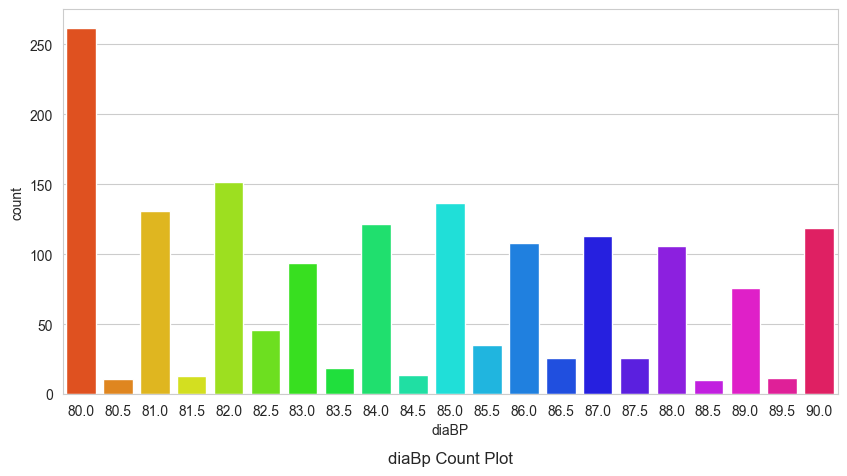

In [34]:
#Normal DiaBP COunt
plt.figure(figsize=(10,5))
dfNBp = df[(df.diaBP>=80) & (df.diaBP<=90)]
dfNBp
plt.title("diaBp Count Plot",y=-0.2)
sns.countplot(x=dfNBp.diaBP, palette='hsv')

plt.show()


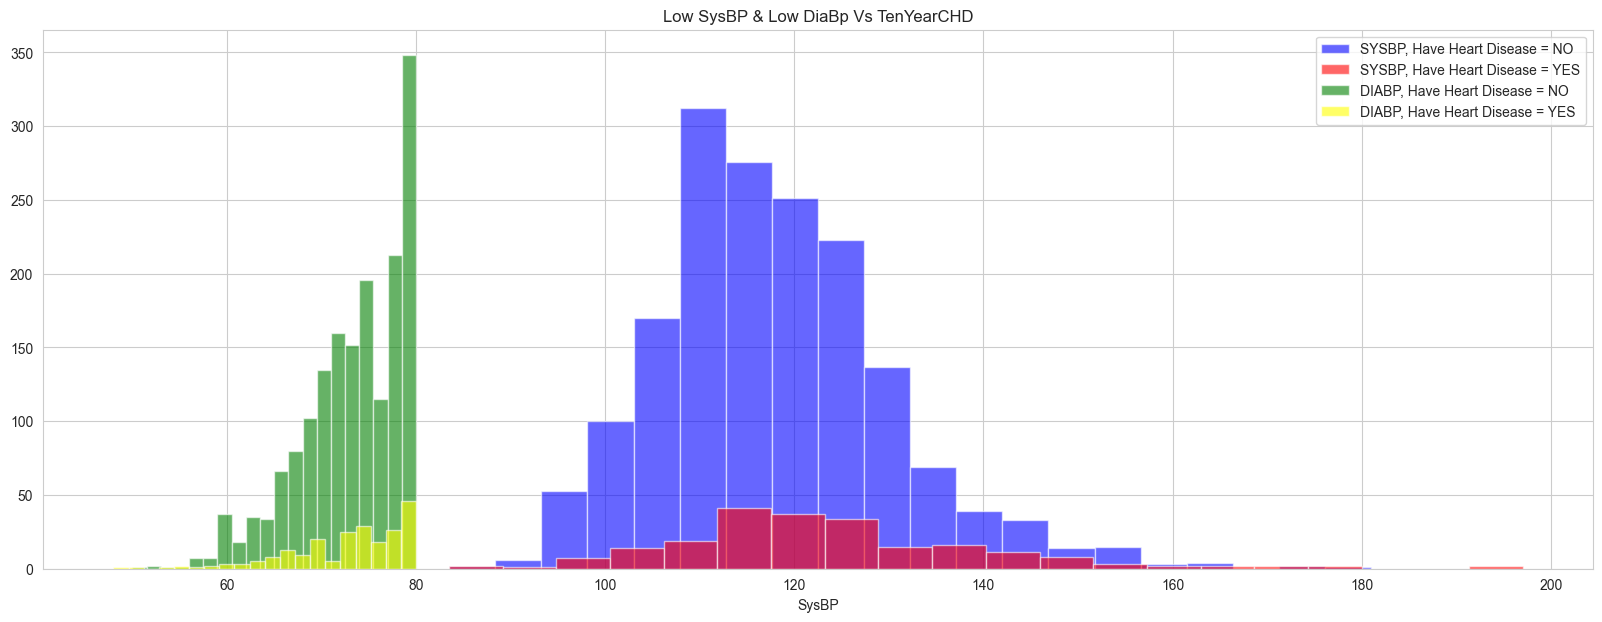

In [35]:
#Low SysBP & Low DiaBp Vs TenYearCHD
plt.figure(figsize=(20,7))
# sns.barplot(x=['Ten Year CHD',"fgrg","uiu"],y=[len(dfLowBp.TenYearCHD),len(dfNBp.TenYearCHD),len(dfHighBp.TenYearCHD)],color='red',alpha=0.2)

# sns.barplot(x=['Low BP',"High BP","Normal BP"], y=[len(dfLowBp.sysBP),len(dfNBp.sysBP),len(dfHighBp.sysBP)])
dfLowBp[dfLowBp["TenYearCHD"]==0]["sysBP"].hist(bins=20, color='blue', label='SYSBP, Have Heart Disease = NO', alpha=0.6)
dfLowBp[dfLowBp["TenYearCHD"]==1]["sysBP"].hist(bins=20, color='red', label='SYSBP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
dfLowBp[dfLowBp["TenYearCHD"]==0]["diaBP"].hist(bins=20, color='green', label='DIABP, Have Heart Disease = NO', alpha=0.6)
dfLowBp[dfLowBp["TenYearCHD"]==1]["diaBP"].hist(bins=20, color='yellow', label='DIABP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
plt.title("Low SysBP & Low DiaBp Vs TenYearCHD",y=1)
plt.legend()
plt.show()

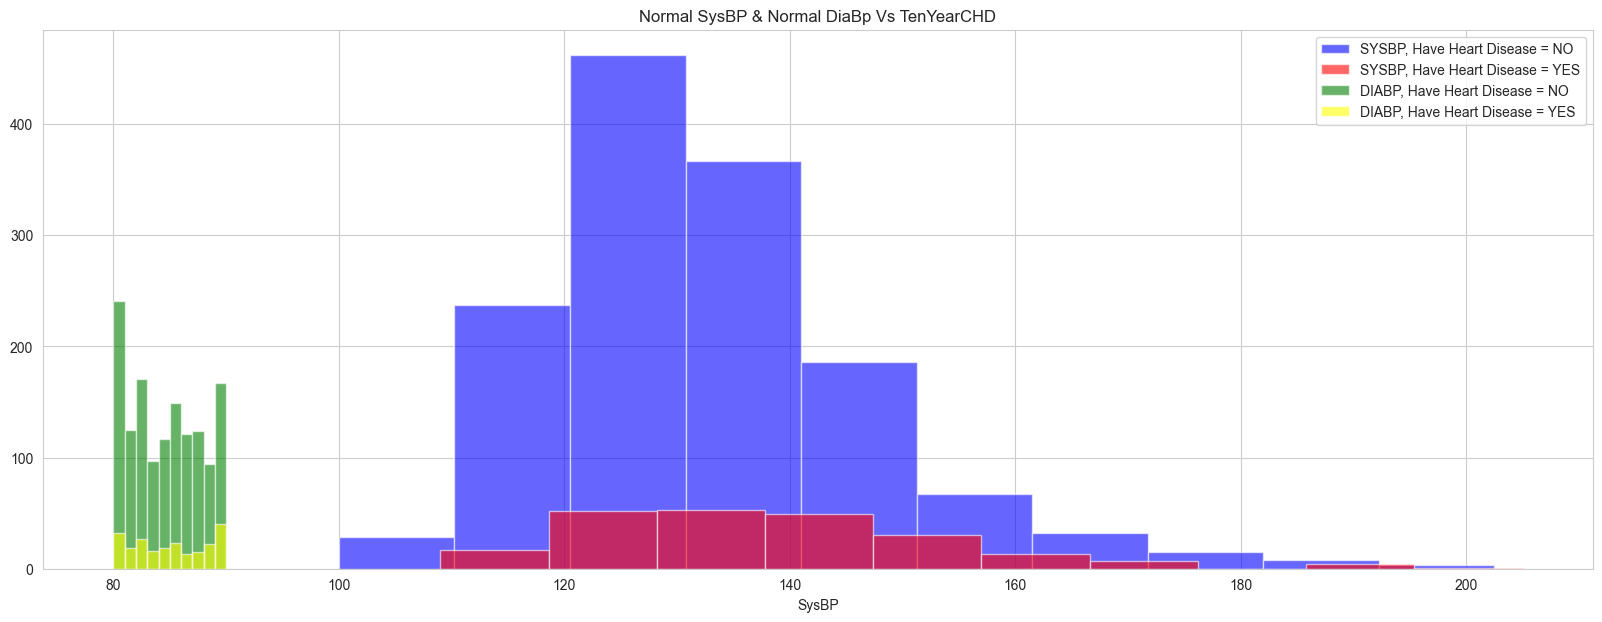

In [36]:
#Normal SysBP & Normal DiaBp Vs TenYearCHD
plt.figure(figsize=(20,7))
dfNBp[dfNBp["TenYearCHD"]==0]["sysBP"].hist(bins=10, color='blue', label='SYSBP, Have Heart Disease = NO', alpha=0.6)
dfNBp[dfNBp["TenYearCHD"]==1]["sysBP"].hist(bins=10, color='red', label='SYSBP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
dfNBp[dfNBp["TenYearCHD"]==0]["diaBP"].hist(bins=10, color='green', label='DIABP, Have Heart Disease = NO', alpha=0.6)
dfNBp[dfNBp["TenYearCHD"]==1]["diaBP"].hist(bins=10, color='yellow', label='DIABP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
plt.title("Normal SysBP & Normal DiaBp Vs TenYearCHD",y=1)
plt.legend()
plt.show()

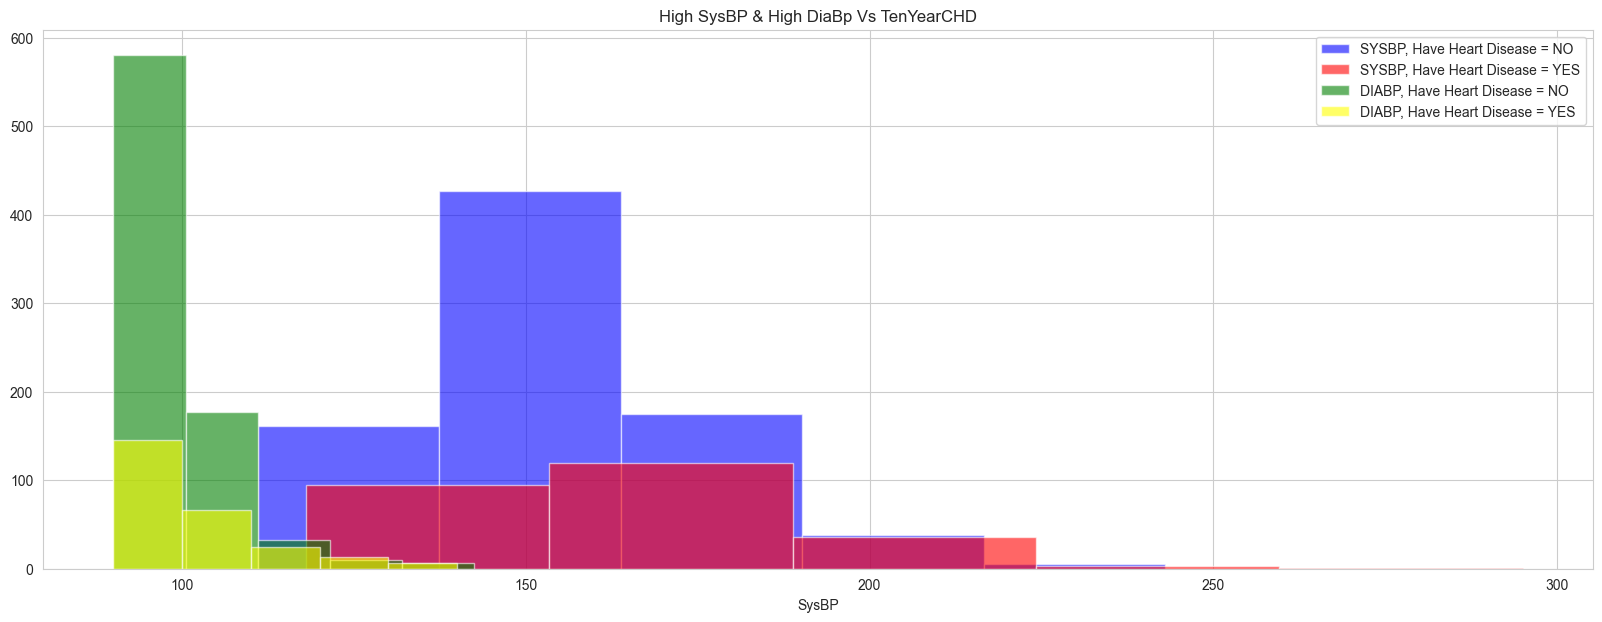

In [37]:
#High SysBP & High DiaBp Vs TenYearCHD
plt.figure(figsize=(20,7))
dfHighBp[dfHighBp["TenYearCHD"]==0]["sysBP"].hist(bins=5, color='blue', label='SYSBP, Have Heart Disease = NO', alpha=0.6)
dfHighBp[dfHighBp["TenYearCHD"]==1]["sysBP"].hist(bins=5, color='red', label='SYSBP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
dfHighBp[dfHighBp["TenYearCHD"]==0]["diaBP"].hist(bins=5, color='green', label='DIABP, Have Heart Disease = NO', alpha=0.6)
dfHighBp[dfHighBp["TenYearCHD"]==1]["diaBP"].hist(bins=5, color='yellow', label='DIABP, Have Heart Disease = YES', alpha=0.6)
plt.xlabel("SysBP")
plt.title("High SysBP & High DiaBp Vs TenYearCHD",y=1)
plt.legend()
plt.show()

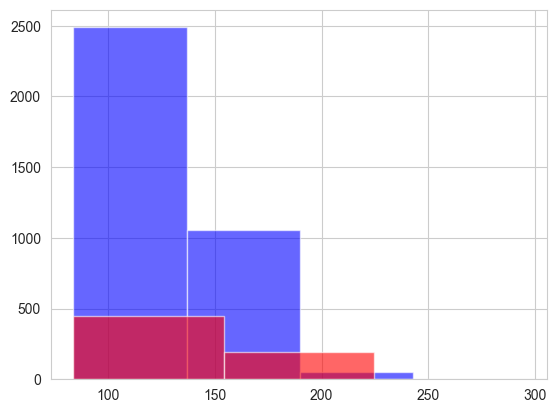

In [38]:

df[df["TenYearCHD"]==0]["sysBP"].hist(bins=3,color="blue",alpha=0.6 , label='')
df[df["TenYearCHD"]==1]['sysBP'].hist(bins=3,color="red",alpha=0.6  , label='')
plt.title("",y=-0.2)
plt.show()

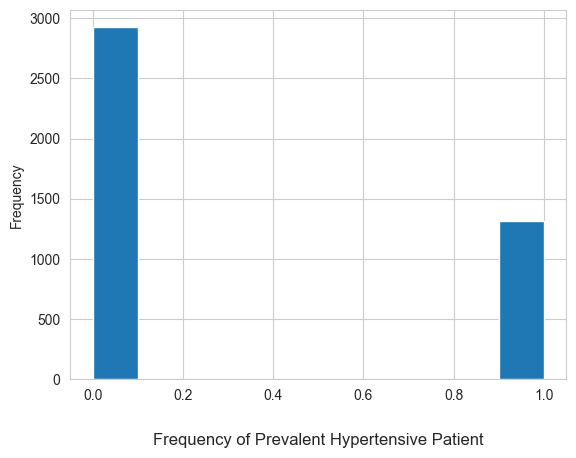

In [39]:
#Frequency of Prevalent Hypertensive Patient
df.	prevalentHyp.plot.hist()
plt.title("Frequency of Prevalent Hypertensive Patient",y=-0.2)
plt.show()

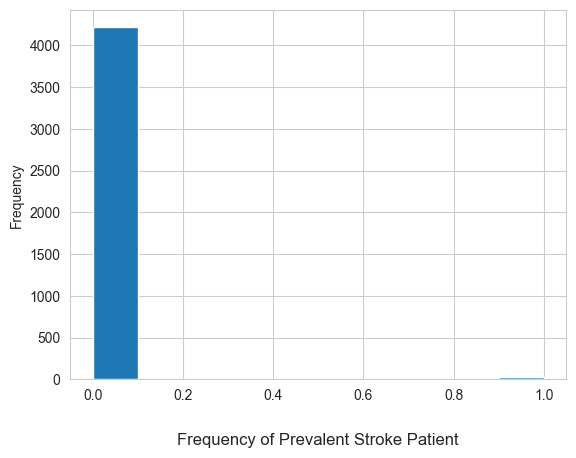

In [40]:
#Frequency of Prevalent Stroke Patient
df.	prevalentStroke.plot.hist()
plt.title("Frequency of Prevalent Stroke Patient",y=-0.2)
plt.show()

Text(0.5, -0.2, 'PreveletStroke vs TenYearCHD')

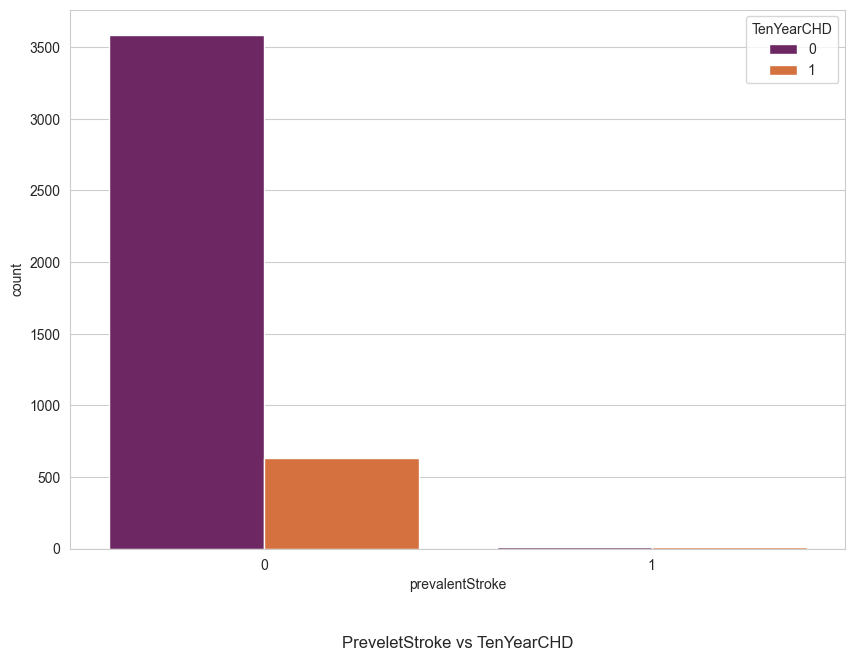

In [41]:
#PreveletStroke vs TenYearCHD
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x = df.prevalentStroke ,hue=df.TenYearCHD, palette = 'inferno')
plt.title("PreveletStroke vs TenYearCHD",y=-0.2)

Text(0.5, -0.2, 'PrevelentHyp vs TenYearCHD')

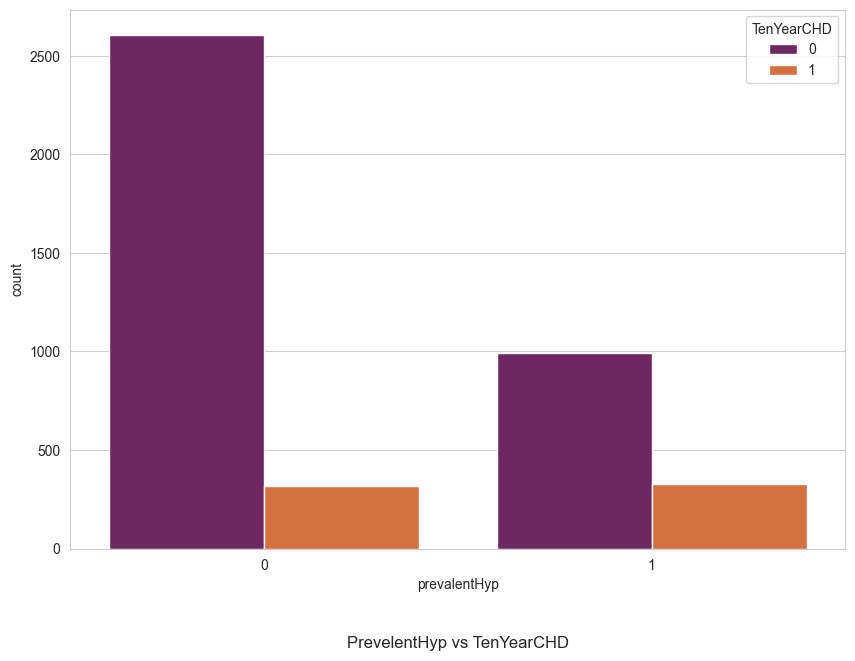

In [42]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x = df.prevalentHyp ,hue=df.TenYearCHD , palette = 'inferno')
plt.title("PrevelentHyp vs TenYearCHD",y=-0.2)

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\2964028500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TenYearCHD', data = df, palette = 'winter')


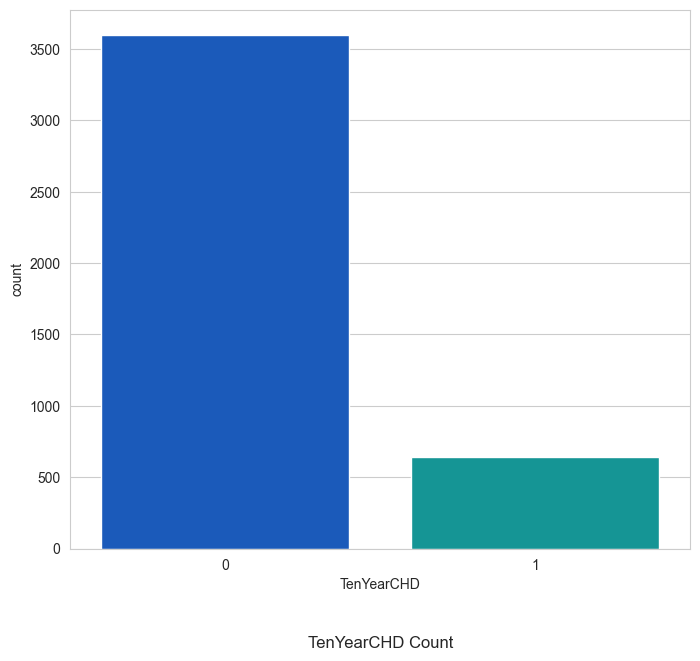

In [43]:
#TenYearCHD Count
plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.countplot(x = 'TenYearCHD', data = df, palette = 'winter')
plt.title("TenYearCHD Count",y=-0.2)
plt.show()

In [44]:
# sns.set_style('whitegrid')
# sns.countplot(x = 'TenYearCHD', hue = 'male', data = df, palette = 'winter')

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\551230131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'age', y = 'cigsPerDay', data = df, palette = 'winter', errorbar=None)


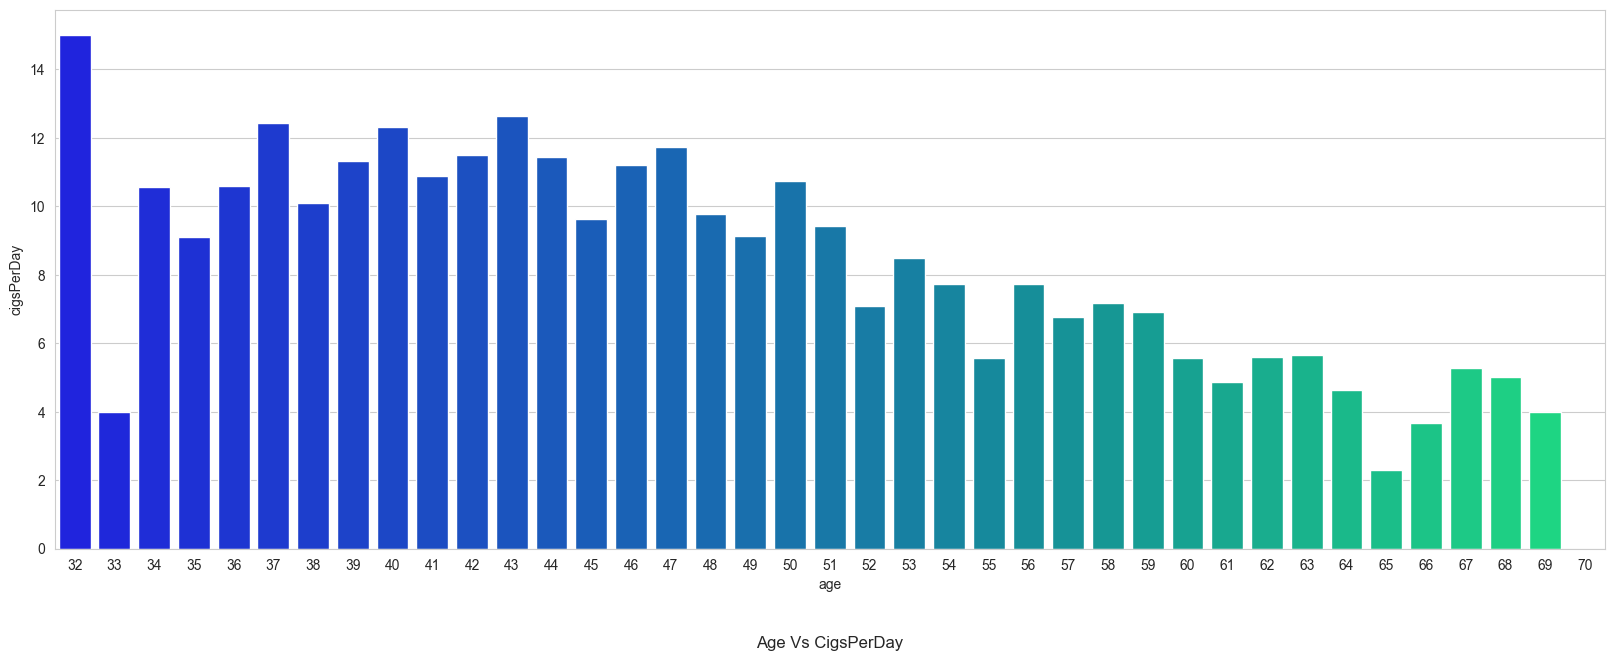

In [45]:
#Age Vs CigsPerDay
plt.figure(figsize=(20,7))
sns.barplot(x= 'age', y = 'cigsPerDay', data = df, palette = 'winter', errorbar=None)
plt.title("Age Vs CigsPerDay",y=-0.2)
plt.show()

C:\Users\mdzee\AppData\Local\Temp\ipykernel_12692\63026280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'age', y = 'diabetes', data = df, palette = 'winter', errorbar=None)


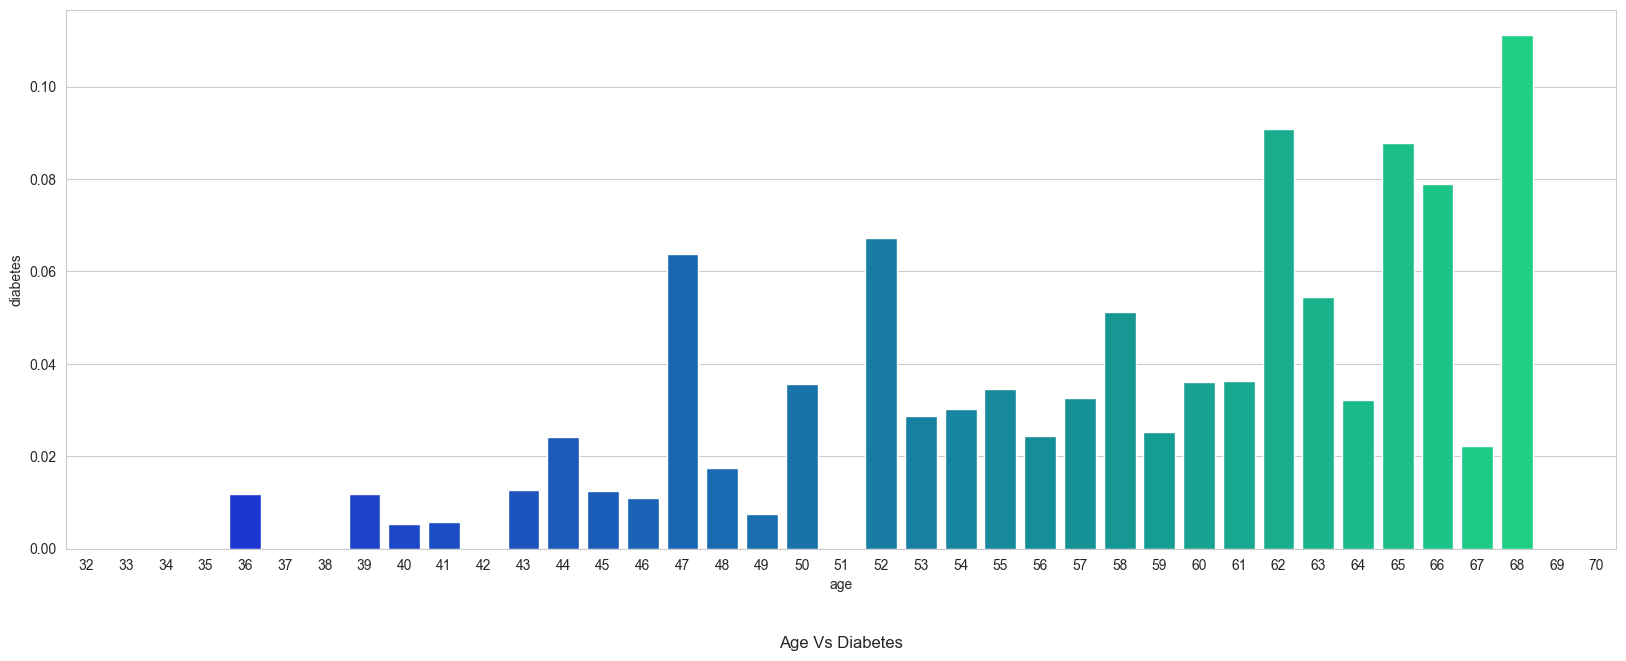

In [46]:
#Age vs diabetes
plt.figure(figsize=(20,7))
sns.barplot(x= 'age', y = 'diabetes', data = df, palette = 'winter', errorbar=None)
plt.title("Age Vs Diabetes",y=-0.2)
plt.show()

```end```

## **Removing Outliers**

In [47]:
#Checking heads before removing outliers
df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


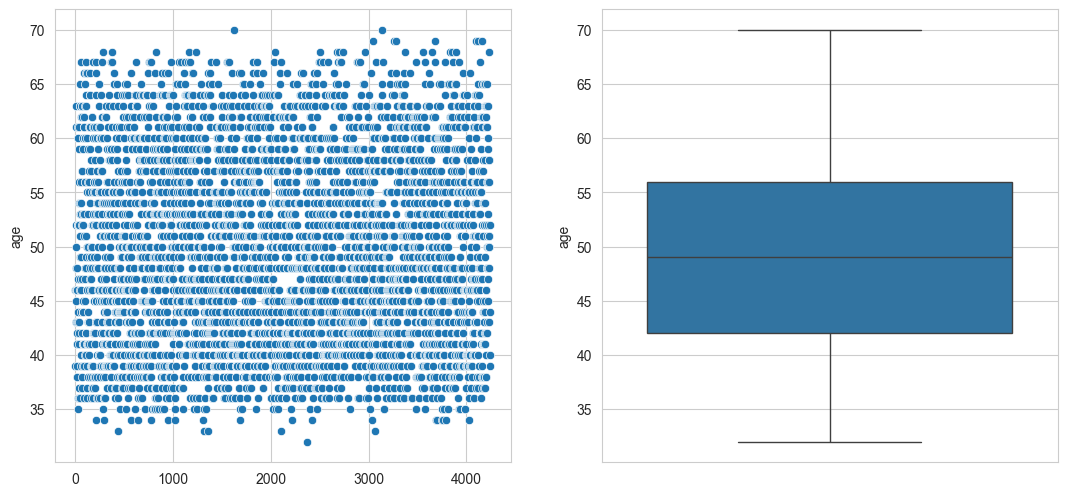

In [48]:
#Checking for outliers in Age
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.age,)
plt.subplot(3,3,2)
sns.scatterplot(df["age"])
plt.show()

In [49]:
#finding out upper and lower limit of age
data=np.array(df.age)
data.sort()
q1=np.percentile(data,25)
q2=np.percentile(data,50)
q3=np.percentile(data,75)
print("First Quartile =",q1)
print("Second Quartile =",q2)
print("Third Quartile =",q3)
iqr=q3-q1
print("Inter Quartile range =",iqr)
lower_lim=(q1-1.5*iqr)
upper_lim=(q3+1.5*iqr)
print("Lower Limit fot age =",lower_lim)
print("Upper Limit for age =",upper_lim)

First Quartile = 42.0
Second Quartile = 49.0
Third Quartile = 56.0
Inter Quartile range = 14.0
Lower Limit fot age = 21.0
Upper Limit for age = 77.0


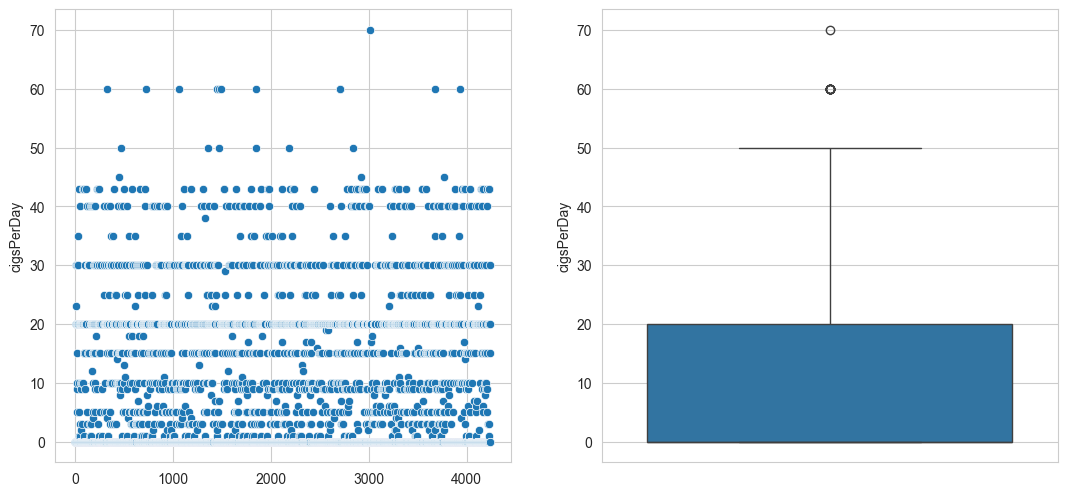

In [50]:
#Scatter and boxplot to check for outliers in CigsPerDay
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.cigsPerDay)
plt.subplot(3,3,2)
sns.scatterplot(df.cigsPerDay)

plt.show()

In [51]:
#Replacing outliers in cigsPerDay witn median of the column.
tempCigsPerDay=df.cigsPerDay

for i in df.cigsPerDay:
    if(i>50):
         tempCigsPerDay.replace(i,tempCigsPerDay.median(),inplace=True)
    
df.cigsPerDay=tempCigsPerDay

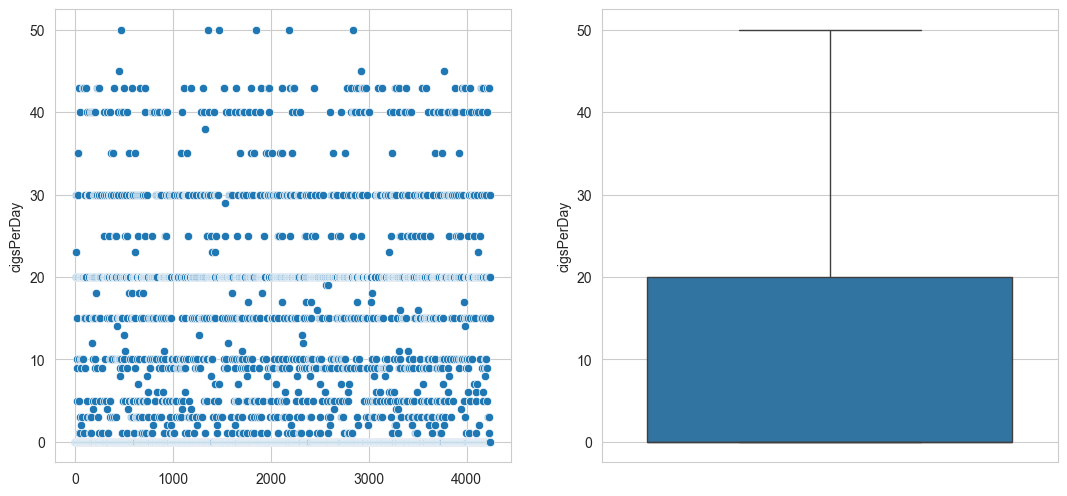

In [52]:
#Scatter and barplot to check the outliers.
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.cigsPerDay)
plt.subplot(3,3,2)
sns.scatterplot(df.cigsPerDay)

plt.show()

In [53]:
#Finding out upper and lower limit of cigsPerDay 
data=np.array(df.cigsPerDay)
data.sort()
q1=np.percentile(data,25)
q2=np.percentile(data,50)
q3=np.percentile(data,75)
print("First Quartile =",q1)
print("Second Quartile =",q2)
print("Third Quartile =",q3)
iqr=q3-q1
print("Inter Quartile range =",iqr)
lower_lim=(q1-1.5*iqr)
upper_lim=(q3+1.5*iqr)
print("Lower Limit fot cigsPerDay =",lower_lim)
print("Upper Limit for cigsPerDay =",upper_lim)

First Quartile = nan
Second Quartile = nan
Third Quartile = nan
Inter Quartile range = nan
Lower Limit fot cigsPerDay = nan
Upper Limit for cigsPerDay = nan


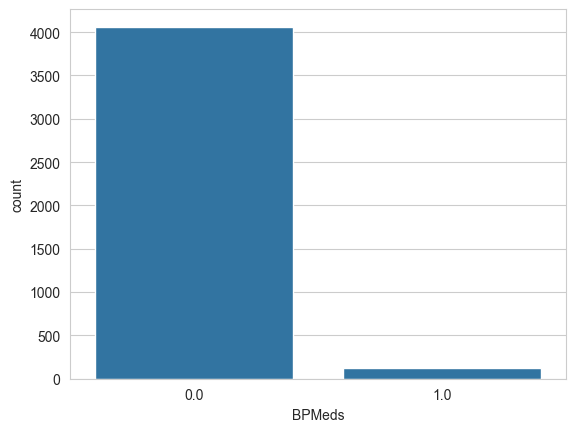

In [54]:
#Count of BPMeds 
sns.countplot(x=df.BPMeds)
plt.show()

In [55]:
df[df.BPMeds!=0].BPMeds.count()

124

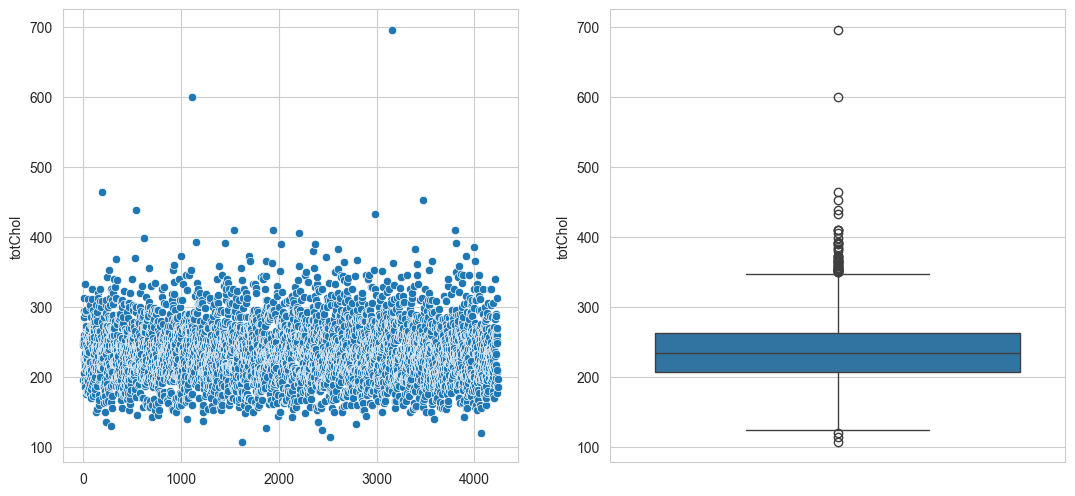

In [56]:
#scatter and box plot to check the outliers in totChol.
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.totChol)
plt.subplot(3,3,2)
sns.scatterplot(df.totChol)
plt.show()

In [57]:
#replacing outliers in totChol with mean.
temp2=df.totChol
j=0
for i in df.totChol:
    j=j+1
    if(i>340 or i<130):
        temp2.replace(i,temp2.mean(),inplace=True)
        # df.drop(j)
df.totChol=temp2

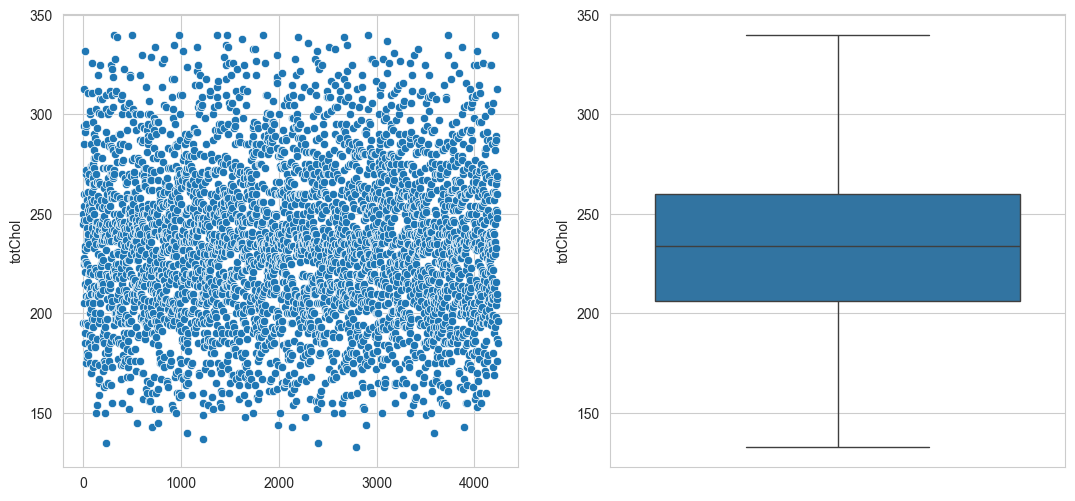

In [58]:
#Scatter and barplot after removing the outliers of totChol.
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.totChol)
plt.subplot(3,3,2)
sns.scatterplot(df.totChol)
plt.show()


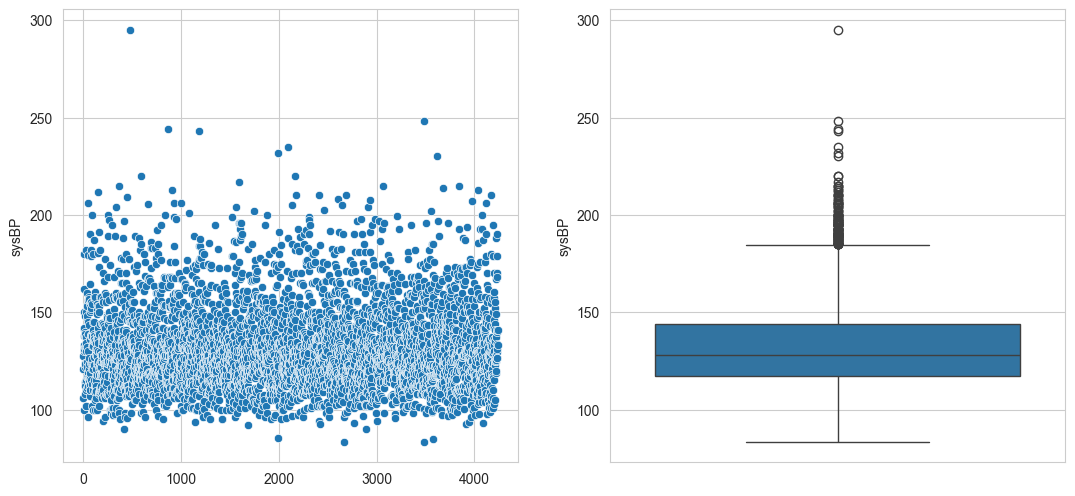

In [59]:
# Scatter and bar plot to check outliers in SysBP
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.sysBP)
plt.subplot(3,3,2)
sns.scatterplot(df.sysBP)
plt.show()

In [60]:
#replacing outliers in sysBP with mean
temp2=df.sysBP
j=0
for i in df.sysBP:
    j=j+1
    if(i>180):
        temp2.replace(i,temp2.mean(),inplace=True)
        # df.drop(j)
df.sysBP=temp2

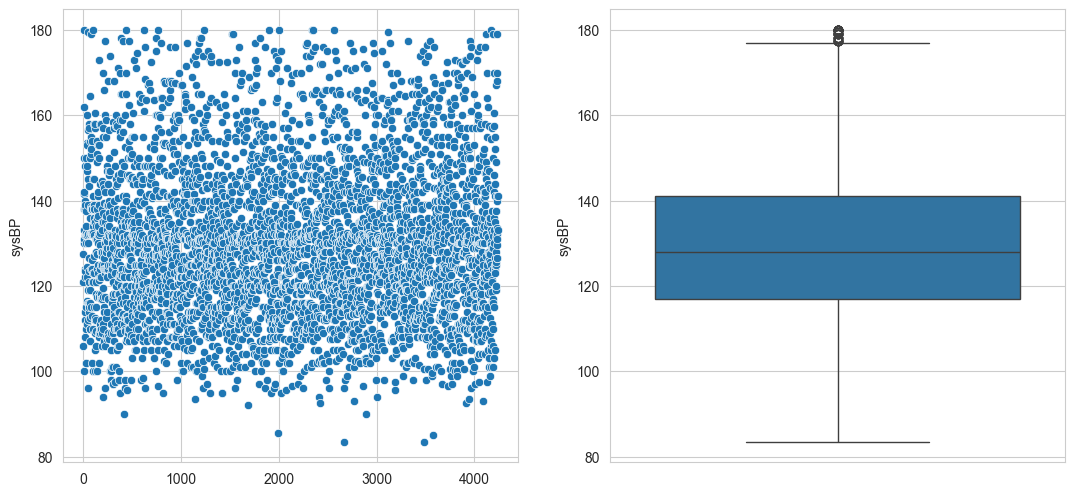

In [61]:
#Scatter and bar plot after removing outliers of sysBP
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.sysBP)
plt.subplot(3,3,2)
sns.scatterplot(df.sysBP)
plt.show()

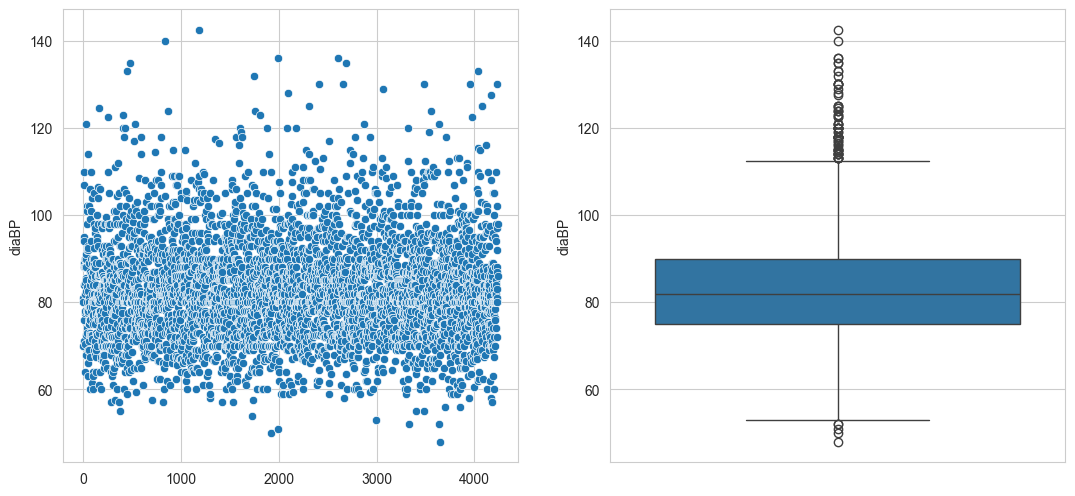

In [62]:
#scatter and bar plot for checking outliers in diaBP
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.diaBP)
plt.subplot(3,3,2)
sns.scatterplot(df.diaBP)
plt.show()

In [63]:
#replacing outliers in diaBP with median.
tempDiaBP=df.diaBP
j=0
for i in df.diaBP:
    j=j+1
    if(i>108 or i<60):
        tempDiaBP.replace(i,tempDiaBP.median(),inplace=True)
        # df.drop(j,axis=0)
df.diaBP=tempDiaBP


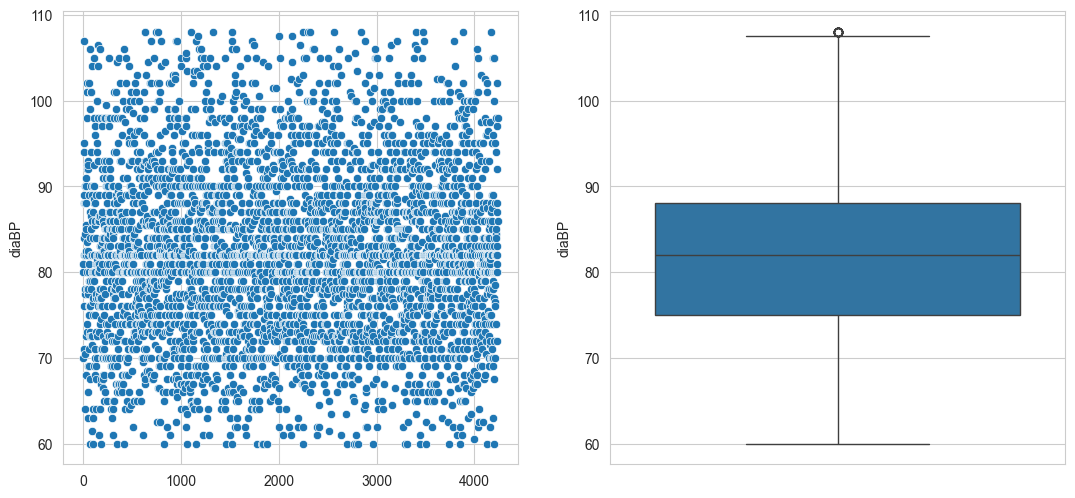

In [64]:
#Scatter and bar plot after removing ouliers of diaBP
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.diaBP)
plt.subplot(3,3,2)
sns.scatterplot(df.diaBP)
plt.show()

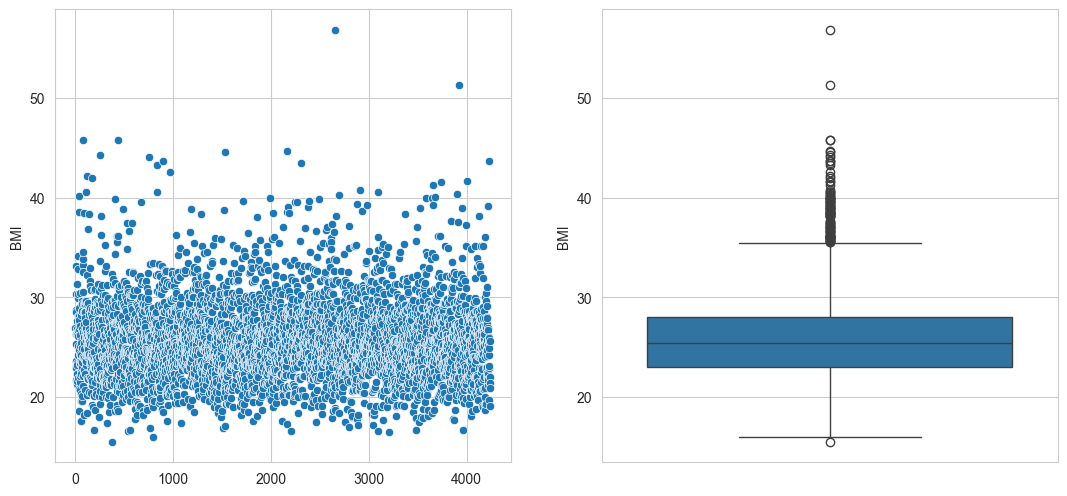

In [65]:
#scatter and bar plot to check outliers in BMI
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.BMI)
plt.subplot(3,3,2)
sns.scatterplot(df.BMI)
plt.show()

In [66]:
#replacing outliers in BMI with median
tempBMI=df.BMI
j=0
for i in df.BMI:
    if(i>35 or i<17.5):
        j=j+1
        tempBMI.replace(i,tempBMI.median(),inplace=True)
        # df.drop(j)
df.BMI=tempBMI
# df

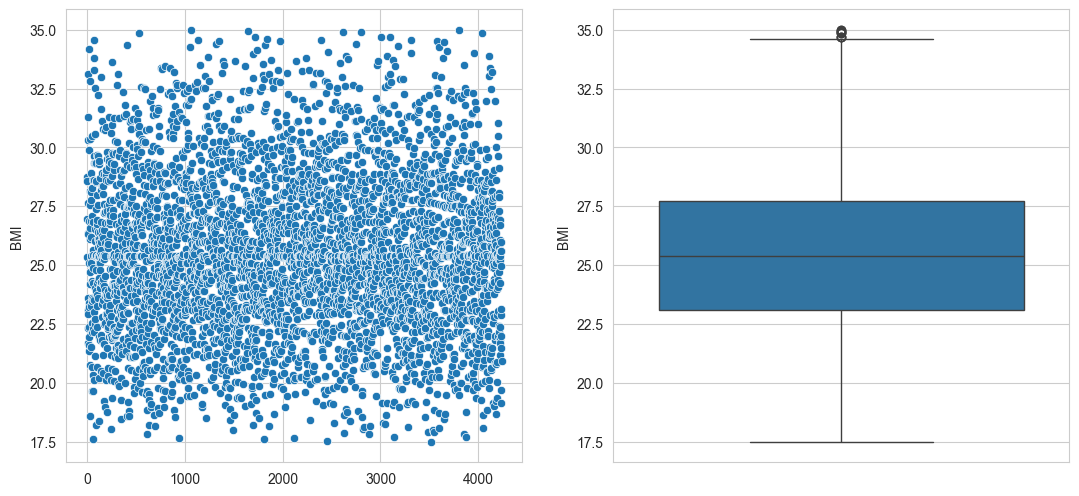

In [67]:
#Scatter and bar plot after removing outlers in BMI
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.BMI)
plt.subplot(3,3,2)
sns.scatterplot(df.BMI)
plt.show()

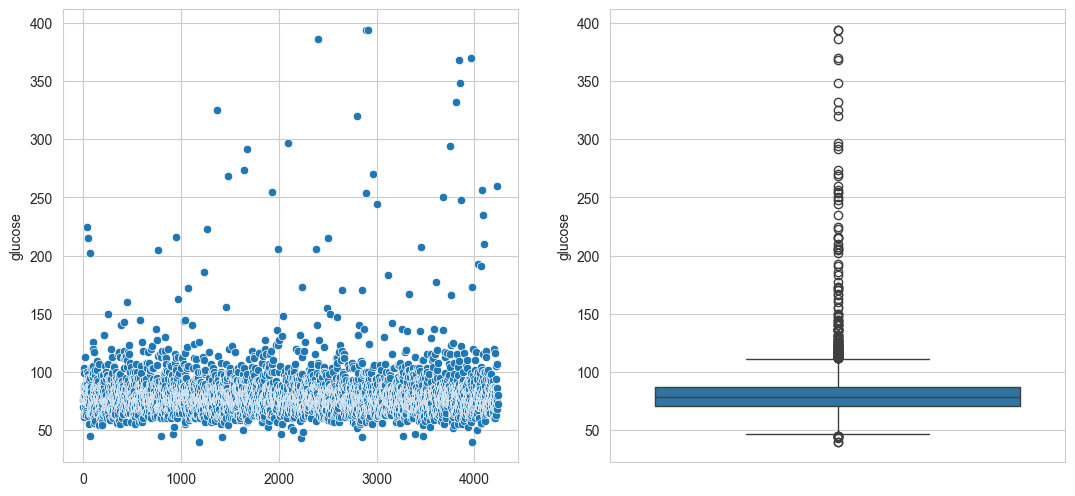

In [68]:
#Scatter and bar plot to check outlers in glucose.
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.glucose)
plt.subplot(3,3,2)
sns.scatterplot(df.glucose)
plt.show()

In [69]:
#Replacing ouliers in glucose with median.
tempGlucose=df.glucose
for i in df.glucose:
    if(i>105 or i<55):
        tempGlucose.replace(i,tempGlucose.median(),inplace=True)
df.glucose=tempGlucose

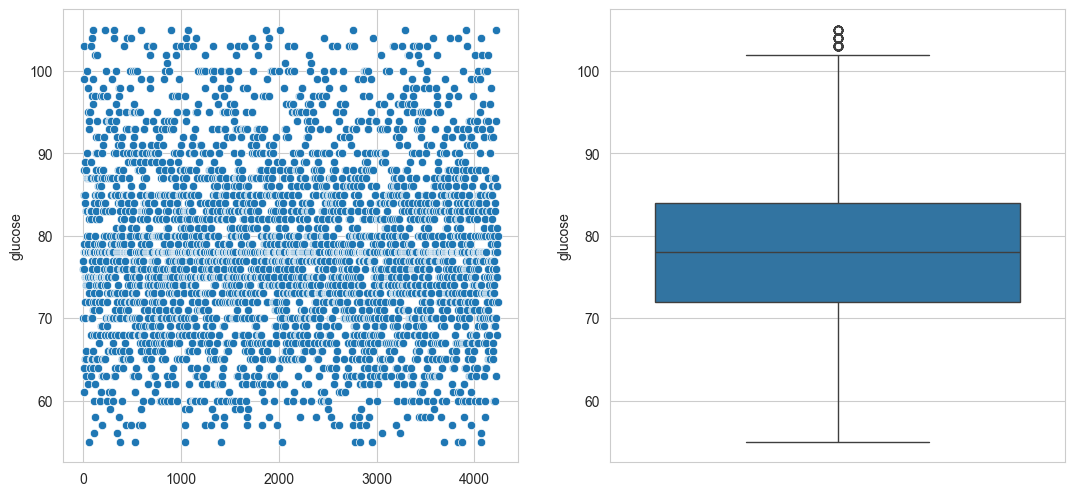

In [70]:
#Scatter and bar plot after removing outliers in glucose.
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(y=df.glucose)
plt.subplot(3,3,2)
sns.scatterplot(df.glucose)
plt.show()

# **Null Value Removal**

In [71]:
#Checking for Null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   cigsPerDay       4211 non-null   float64
 3   BPMeds           4187 non-null   float64
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4190 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4221 non-null   float64
 11  glucose          3852 non-null   float64
 12  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 430.8 KB


In [72]:
#Counting number of Null values in each column
df.isna().sum()

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [73]:
# z= df.education.mode()
# print(z)
# df.education.replace(to_replace=np.nan, value = z[0],inplace=True )
# print(df.loc[131]['cigsPerDay'])

In [74]:
#Replacing null values in cigsPerDay with mode.
z= df.cigsPerDay.mode()
print(z)
df.cigsPerDay.replace(to_replace=np.nan, value = z[0],inplace=True )
print(df.loc[131]['cigsPerDay'])


0    0.0
Name: cigsPerDay, dtype: float64
0.0


In [75]:
#Null values in cigsPerDay has been removed.
df.isna().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [76]:
#Replacing Null values in BPMeds with mode.
y= df.BPMeds.mode()
print(y)
df.BPMeds.replace(to_replace=np.nan, value = y[0],inplace=True )



0    0.0
Name: BPMeds, dtype: float64


In [77]:
#Null values in BPMeds has been removed.
df.isna().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [78]:
#Replacing Null values in totChol with mode.
x=df.totChol.mode()
print(x)
df.totChol.replace(to_replace=np.nan, value= x[0], inplace= True) 


0    240.0
Name: totChol, dtype: float64


In [79]:
#Null values in totChol has been removed
df.isna().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [80]:
#Replacing Null values in BMI with mode.
y=df.BMI.mode()
print(y)
df.BMI.replace(to_replace=np.nan, value=y[0], inplace=True)

0    25.4
Name: BMI, dtype: float64


In [81]:
#Null values in BMI has been removed.
df.isna().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
glucose            388
TenYearCHD           0
dtype: int64

In [82]:
#Replacing Null values in glucose with mode.
z=df.glucose.mode()
print(z)
df.glucose.replace(to_replace=np.nan, value=z[0], inplace=True)

0    78.0
Name: glucose, dtype: float64


In [83]:
#Null values in glucose has been removed.
df.isna().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
glucose            0
TenYearCHD         0
dtype: int64

In [84]:
# z=df.heartRate.mode()
# print(z)
# df.heartRate.replace(to_replace=np.nan, value=z[0], inplace=True)

In [85]:
#All Null values have been removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   cigsPerDay       4240 non-null   float64
 3   BPMeds           4240 non-null   float64
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 430.8 KB


# **Train Test Split**

In [86]:
#Splitting dataset in to train dataset and test dataset using SKlearn train test split.
X_train,X_test,y_train,y_test=train_test_split(df.drop('TenYearCHD',axis=1),df['TenYearCHD'],test_size=0.30,random_state=56)
print("No. of Train rows -> ",y_train.shape, X_train.shape)
print("No. of Test rows -> ", y_test.shape, X_test.shape)

No. of Train rows ->  (2968,) (2968, 12)
No. of Test rows ->  (1272,) (1272, 12)


In [87]:
#X training dataset
X_train

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
829,0,53,0.0,0.0,0,0,0,240.0,133.5,82.5,25.40,78.0
3342,0,63,0.0,0.0,0,0,0,297.0,133.5,92.0,25.09,74.0
1821,0,66,0.0,0.0,0,1,0,275.0,132.5,85.0,34.36,78.0
2215,1,60,20.0,0.0,0,0,0,260.0,127.5,72.5,25.06,75.0
49,1,36,20.0,0.0,0,1,0,194.0,139.0,93.0,24.33,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,57,30.0,0.0,0,0,0,225.0,140.0,88.0,24.71,78.0
1259,0,43,0.0,0.0,0,0,0,204.0,132.0,88.0,28.59,83.0
3264,0,51,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,96.0
399,1,66,0.0,0.0,0,1,0,276.0,159.0,82.0,31.42,65.0


In [88]:
#Y Taining Dataset.
y_train

829     0
3342    0
1821    1
2215    1
49      0
       ..
1146    0
1259    0
3264    0
399     0
2532    0
Name: TenYearCHD, Length: 2968, dtype: int64

In [89]:
#X Testing Dataset
X_test

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
3756,0,46,15.0,0.0,0,1,0,274.0,158.000000,97.0,22.83,78.0
2145,1,62,0.0,0.0,0,0,0,202.0,149.500000,85.0,25.42,80.0
30,1,36,35.0,0.0,0,0,0,295.0,102.000000,68.0,28.15,63.0
1685,0,53,0.0,0.0,0,0,0,225.0,92.000000,69.0,24.17,68.0
1983,0,63,0.0,0.0,0,1,0,283.0,164.000000,86.0,24.64,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4121,0,55,0.0,0.0,0,0,0,240.0,145.000000,96.0,26.27,78.0
1637,0,36,5.0,0.0,0,0,0,200.0,121.500000,72.5,23.09,75.0
720,0,39,20.0,0.0,0,0,0,240.0,120.000000,80.0,24.79,75.0
4006,1,40,20.0,0.0,0,0,0,242.0,115.000000,74.0,23.09,80.0


In [90]:
#Y testing Dataset
y_test

3756    0
2145    0
30      0
1685    0
1983    0
       ..
4121    0
1637    0
720     0
4006    0
3729    0
Name: TenYearCHD, Length: 1272, dtype: int64

In [91]:
#Standarinsing the X Test 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# y_train_std = scaler.fit_transform(np.reshape(y_train,(1,-1)))
# print ("X Train Transform",X_train_std,"Y Train Transform",y_train_std)
# print(type(y_train_std[0][0]))

In [92]:
print(X_train_std)
X_train_std=pd.DataFrame(X_train_std,columns=X_train.columns)
X_train_std

[[-0.85004523  0.39779183 -0.76665135 ...  0.03309737 -0.03265677
  -0.01435914]
 [-0.85004523  1.57046381 -0.76665135 ...  0.98730342 -0.12558896
  -0.43841805]
 [-0.85004523  1.9222654  -0.76665135 ...  0.28420423  2.65338352
  -0.01435914]
 ...
 [-0.85004523  0.16325743 -0.59417296 ... -0.11756674 -1.57952818
   1.89390598]
 [ 1.17640798  1.9222654  -0.76665135 ... -0.017124    1.77202655
  -1.39255061]
 [-0.85004523 -1.00941454 -0.76665135 ...  1.08774616 -0.03265677
   0.93977342]]


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,-0.850045,0.397792,-0.766651,-0.181842,-0.082367,-0.674993,-0.157676,0.132803,0.186685,0.033097,-0.032657,-0.014359
1,-0.850045,1.570464,-0.766651,-0.181842,-0.082367,-0.674993,-0.157676,1.575196,0.186685,0.987303,-0.125589,-0.438418
2,-0.850045,1.922265,-0.766651,-0.181842,-0.082367,1.481497,-0.157676,1.018483,0.131247,0.284204,2.653384,-0.014359
3,1.176408,1.218662,0.958133,-0.181842,-0.082367,-0.674993,-0.157676,0.638906,-0.145942,-0.971330,-0.134582,-0.332403
4,1.176408,-1.595751,0.958133,-0.181842,-0.082367,1.481497,-0.157676,-1.031232,0.491593,1.087746,-0.353423,-1.710595
...,...,...,...,...,...,...,...,...,...,...,...,...
2963,1.176408,0.866861,1.820525,-0.181842,-0.082367,-0.674993,-0.157676,-0.246774,0.547030,0.585532,-0.239506,-0.014359
2964,-0.850045,-0.774880,-0.766651,-0.181842,-0.082367,-0.674993,-0.157676,-0.778181,0.103528,0.585532,0.923646,0.515715
2965,-0.850045,0.163257,-0.594173,-0.181842,-0.082367,-0.674993,-0.157676,0.664211,-0.173661,-0.117567,-1.579528,1.893906
2966,1.176408,1.922265,-0.766651,-0.181842,-0.082367,1.481497,-0.157676,1.043788,1.600348,-0.017124,1.772027,-1.392551


# **Logistic Regression**

In [93]:
#Importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [94]:
#Initializing Logistic Regression
lreg_model = LogisticRegression(max_iter=10000)
lreg_model

LogisticRegression(max_iter=10000)

In [95]:
#Training Logistic Regression.
lreg_trained_model=lreg_model.fit(X_train, y_train)

In [96]:
#predicting values with X_test.
predictions = lreg_trained_model.predict(X_test)
print (predictions.shape)
predictions


(1272,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
#importing classicfication report
from sklearn.metrics import classification_report

In [98]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1073
           1       0.78      0.07      0.13       199

    accuracy                           0.85      1272
   macro avg       0.82      0.53      0.52      1272
weighted avg       0.84      0.85      0.80      1272



In [99]:
#importing confusion matrix and accuracy score and printing the confusion matrix.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
print ('Accuracy Score :', accuracy_score(y_test, predictions))
confusion_df

Accuracy Score : 0.8514150943396226


,0,1
0,1069,4
1,185,14


In [100]:
#Importing GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

In [101]:
##Finding the best parameters using GridSearchCV
#parameters=[{"penalty":["l1","elasticnet",'l2',],"dual":[True,False],"C":[1.0,2.0,3.0,4.0],"fit_intercept":[True,False],"intercept_scaling":[1,2,3,4,5],"class_weight":['balanced'],"solver":['liblinear','newton-cg','newton-cholesky','sag','saga']}]
# grid_search=GridSearchCV(estimator=lreg_model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
# grid_search=grid_search.fit(X_train_std,y_train)

In [102]:
##Accuracy using GridSearchCV
# accuracy=grid_search.best_score_
# accuracy

In [103]:
#Printing The Best parameters found by GridSearchCV
#grid_search.best_params_

In [104]:
##Logistic Regression with class_weight
lreg_cw = LogisticRegression(solver='liblinear', class_weight='balanced',dual= True,fit_intercept= True,penalty='l2',intercept_scaling=1,max_iter=100000)
lreg_trained_cw=lreg_cw.fit(X_train, y_train)
predictions = lreg_trained_cw.predict(X_test)
print (predictions.shape)
predictions

(1272,)


C:\Users\mdzee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [105]:
#Printing classification report of Logistic Regression after using parameters found by GridSearchCV
print(classification_report(y_test,predictions))
lr_accuracy_score=accuracy_score(y_test, predictions)
print ('Accuracy Score :',lr_accuracy_score)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1073
           1       0.27      0.58      0.37       199

    accuracy                           0.69      1272
   macro avg       0.59      0.65      0.58      1272
weighted avg       0.80      0.69      0.73      1272

Accuracy Score : 0.6918238993710691


In [106]:
#Confusion matrix of Logistic regression after using the parameters found by GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
print ('Accuracy Score :', accuracy_score(y_test, predictions))
confusion_df

Accuracy Score : 0.6918238993710691


,0,1
0,764,309
1,83,116


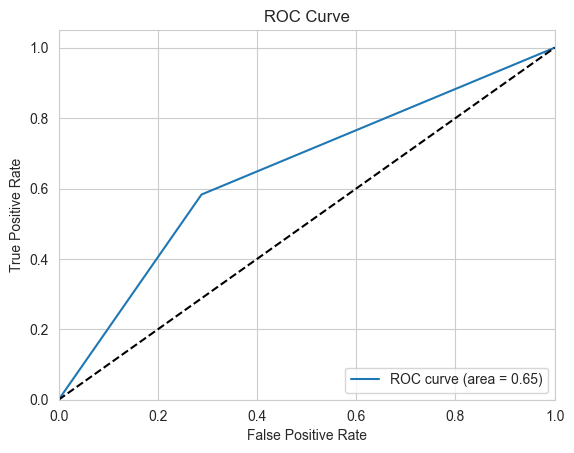

In [107]:
#ROC Curve of Logistic Regression.
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [108]:
# X_train,X_test,y_train,y_test=train_test_split(df.drop('TenYearCHD',axis=1),df['TenYearCHD'],test_size=0.30,random_state=101)
# print("No. of Train rows -> ",y_train.shape, X_train.shape)
# print("No. of Test rows -> ", y_test.shape, X_test.shape)

In [109]:
#Importing Random Forest.
from sklearn.ensemble import RandomForestClassifier

In [110]:
#Fitting Random forest classifier.
clf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)

In [111]:
#Testing Random Forest Classifier.
predictions=clf.predict(X_test)
print (predictions.shape)
predictions

(1272,)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
#Classification report of Random Forest.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1073
           1       0.31      0.05      0.08       199

    accuracy                           0.83      1272
   macro avg       0.58      0.51      0.49      1272
weighted avg       0.76      0.83      0.78      1272



In [113]:
#Confusion matrix of random forest classifier.
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
print("Percentage of 0 Predicted correctly = ",(confusion_df[0][0]/(confusion_df[0][0]+confusion_df[1][0]))*100)
print("Percentage of 1 Predicted correctly = ",(confusion_df[1][1]/(confusion_df[1][1]+confusion_df[0][1]))*100)
confusion_df

Percentage of 0 Predicted correctly =  98.13606710158435
Percentage of 1 Predicted correctly =  4.522613065326634


,0,1
0,1053,20
1,190,9


In [114]:
# View a list of the features and their importance scores
list(zip(X_train, clf.feature_importances_))

[('male', 0.02545478371143646),
 ('age', 0.13687209051287266),
 ('cigsPerDay', 0.07228464848659573),
 ('BPMeds', 0.007769191432079697),
 ('prevalentStroke', 0.0027158825547201264),
 ('prevalentHyp', 0.02798745314647995),
 ('diabetes', 0.013342161832965285),
 ('totChol', 0.1556181050991587),
 ('sysBP', 0.15254591278150137),
 ('diaBP', 0.13131539905173154),
 ('BMI', 0.15102884930568222),
 ('glucose', 0.1230655220847761)]

In [115]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\mdzee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [116]:
##Importing Balanced Random forest classifier.
from imblearn.ensemble import BalancedRandomForestClassifier

In [117]:
#Training Balanced Random Forest Classifier.
clf_balanced=BalancedRandomForestClassifier(max_depth=2, random_state=0)
clf_balanced.fit(X_train,y_train)

C:\Users\mdzee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\mdzee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\mdzee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn

BalancedRandomForestClassifier(max_depth=2, random_state=0)

In [118]:
#Testing Random Forest Classifier.
predictions=clf_balanced.predict(X_test)
print (predictions.shape)
predictions

(1272,)


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [119]:
#Printing classification report of Balanced Random Forest Classifier.
print(classification_report(y_test,predictions))
rf_accuracy_score=accuracy_score(y_test, predictions)
print ('Accuracy Score :',rf_accuracy_score)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1073
           1       0.24      0.59      0.35       199

    accuracy                           0.65      1272
   macro avg       0.57      0.63      0.55      1272
weighted avg       0.79      0.65      0.69      1272

Accuracy Score : 0.6477987421383647


In [120]:
#Printing confusion matrix of Balanced Random Forest Classifier.
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
print("Percentage of 0 Predicted correctly = ",(confusion_df[0][0]/(confusion_df[0][0]+confusion_df[1][0]))*100)
print("Percentage of 1 Predicted correctly = ",(confusion_df[1][1]/(confusion_df[1][1]+confusion_df[0][1]))*100)
confusion_df

Percentage of 0 Predicted correctly =  65.79683131407269
Percentage of 1 Predicted correctly =  59.2964824120603


,0,1
0,706,367
1,81,118


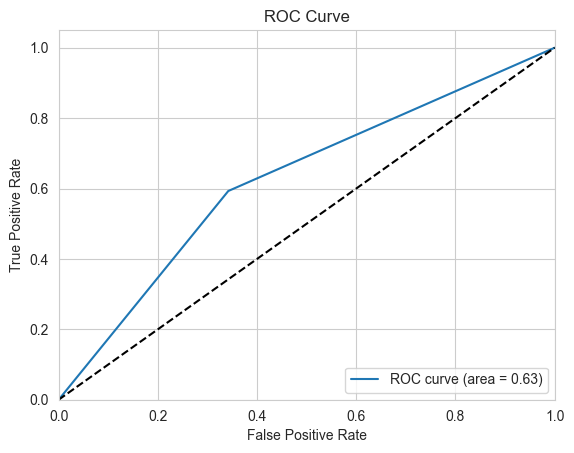

In [121]:
#Roc curve for balanced random forest classifier.
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **K-Nearest Neighbour**

In [122]:
#Importing KNN classifier.
from sklearn.neighbors import KNeighborsClassifier

In [123]:
# X_train,X_test,y_train,y_test=train_test_split(df.drop('TenYearCHD',axis=1),df['TenYearCHD'],test_size=0.30,random_state=5)
# print("No. of Train rows -> ",y_train.shape, X_train.shape)
# print("No. of Test rows -> ", y_test.shape, X_test.shape)
# X_train_std=scaler.fit_transform(X_train)
# print(X_train)

In [124]:
#Initializing KNN Classifier.
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', n_jobs=-1)

In [125]:
# parameters=[{"n_neighbors":[1,2,3,4,5],"weights":["uniform","distance"],"algorithm":["ball_tree","kd_tree","brute","auto"],"leaf_size":[10,20,30,40,50],"p":[1,2,3,4,5]}]
# grid_search=GridSearchCV(estimator=knn,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
# grid_search=grid_search.fit(X_train_std,y_train)

In [126]:
# accuracy=grid_search.best_score_
# accuracy

In [127]:
# grid_search.best_params_

In [128]:
#Training KNN Classifier.
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [129]:
#Testing KNN classifier.
X_test_std = scaler.fit_transform(X_test)
predictions=knn.predict(X_test_std)
print (predictions.shape)
predictions

(1272,)


C:\Users\mdzee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [130]:
from sklearn.metrics import classification_report

In [131]:
#Printing classification report of KNN
print(classification_report(y_test,predictions))
knn_accuracy_score=accuracy_score(y_test, predictions)
print ('Accuracy Score :',rf_accuracy_score)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1073
           1       0.26      0.09      0.13       199

    accuracy                           0.82      1272
   macro avg       0.55      0.52      0.52      1272
weighted avg       0.76      0.82      0.78      1272

Accuracy Score : 0.6477987421383647


In [132]:
#Printing confusion matrix of KNN
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
confusion_df

,0,1
0,1021,52
1,181,18


In [133]:
j=0
k=0
for i in y_train:
    if i==0:
        j=j+1
    else:
        k=k+1
print("No. of 1 =",k)
print("Percentage of 1 =",(k/len(y_train))*100)
print("No. of 0 =",j)
print("Percentage of 0 =",j/len(y_train)*100)

No. of 1 = 445
Percentage of 1 = 14.993261455525605
No. of 0 = 2523
Percentage of 0 = 85.00673854447439


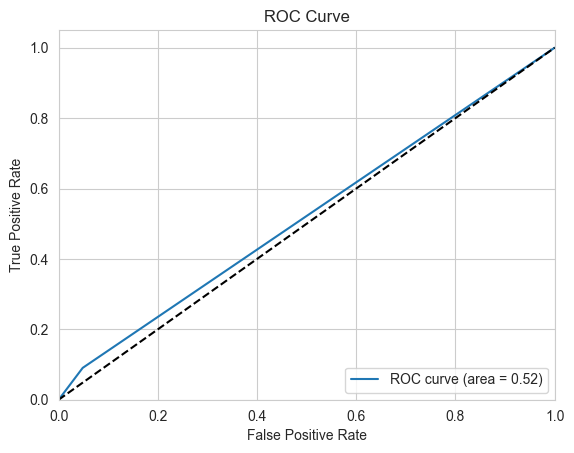

In [134]:
#Roc of KNN
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree**

In [135]:
#Importing decision tree
from sklearn.tree import DecisionTreeClassifier

In [136]:
# X_train,X_test,y_train,y_test=train_test_split(df.drop('TenYearCHD',axis=1),df['TenYearCHD'],test_size=0.30,random_state=5)
# print("No. of Train rows -> ",y_train.shape, X_train.shape)
# print("No. of Test rows -> ", y_test.shape, X_test.shape)
# X_train_std=scaler.fit_transform(X_train)
# print(X_train)

In [137]:
#initializing decision tree.
dt_train_gini = DecisionTreeClassifier()

In [138]:
# parameters=[{"criterion":["gini", "entropy", "log_loss"],"splitter":["best","random"],"max_depth":[5,10,15,20,25],"min_samples_split":[1,2,3,4],"min_samples_leaf":[1,2,3,4],"min_weight_fraction_leaf":[0,1,2,3,4],"max_features":["auto","sqrt","log2"]}]
# grid_search=GridSearchCV(estimator=dt_train_gini,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
# grid_search=grid_search.fit(X_train_std,y_train)

In [139]:
# accuracy=grid_search.best_score_
# accuracy

In [140]:
# grid_search.best_params_

In [141]:
#Initializing decision tree with best parameters 
dt_train_gini=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,min_weight_fraction_leaf=0,splitter='random')

In [142]:
#training decision tree.
dt_trained=dt_train_gini.fit(X_train, y_train)

In [143]:
#testing decision tree.
predictions=dt_trained.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
print(dt_train_gini.predict_proba(X_train)[:10])

[[0.88439306 0.11560694]
 [0.87407407 0.12592593]
 [0.78651685 0.21348315]
 [0.83544304 0.16455696]
 [0.5        0.5       ]
 [0.94932432 0.05067568]
 [0.64347826 0.35652174]
 [0.94932432 0.05067568]
 [0.94285714 0.05714286]
 [0.64347826 0.35652174]]


In [145]:
print(dt_train_gini.predict_proba(X_train)[-10:])

[[0.78651685 0.21348315]
 [0.73076923 0.26923077]
 [1.         0.        ]
 [0.78651685 0.21348315]
 [0.89090909 0.10909091]
 [0.82142857 0.17857143]
 [0.89090909 0.10909091]
 [0.88439306 0.11560694]
 [0.85714286 0.14285714]
 [0.78651685 0.21348315]]


In [146]:
#Printing classification report pf Decision tree.
print(classification_report(y_test,predictions))
dct_accuracy_score=accuracy_score(y_test, predictions)
print ('Accuracy Score :',rf_accuracy_score)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1073
           1       0.56      0.03      0.05       199

    accuracy                           0.84      1272
   macro avg       0.70      0.51      0.48      1272
weighted avg       0.80      0.84      0.78      1272

Accuracy Score : 0.6477987421383647


In [147]:
#printing confusion matrix for decision tree
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions))
confusion_df

,0,1
0,1069,4
1,194,5


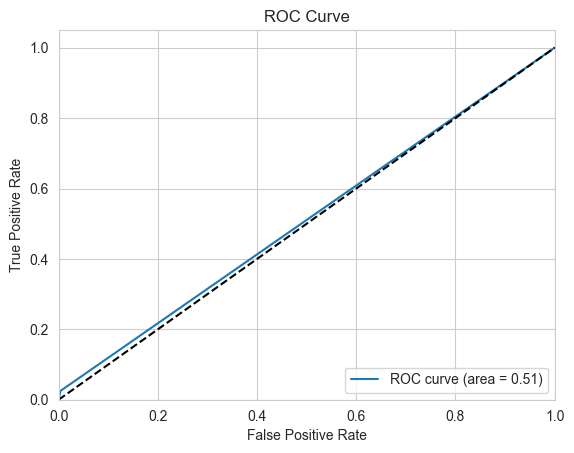

In [148]:
#ROC Curve for decision tree.
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Comparision Of Models**

In [149]:
#Printing accuracy scores.
accuracy_score_dict={"Models":['Logistic Regression','Random Forest','KNN Classifier','Decision Tree'],"Accuracy_Score":[lr_accuracy_score,rf_accuracy_score,knn_accuracy_score,dct_accuracy_score]}
accuracy_score_df=pd.DataFrame.from_dict(accuracy_score_dict)
accuracy_score_df

,Models,Accuracy_Score
0,Logistic Regression,0.691824
1,Random Forest,0.647799
2,KNN Classifier,0.816824
3,Decision Tree,0.844340


<Axes: xlabel='Models', ylabel='Accuracy_Score'>

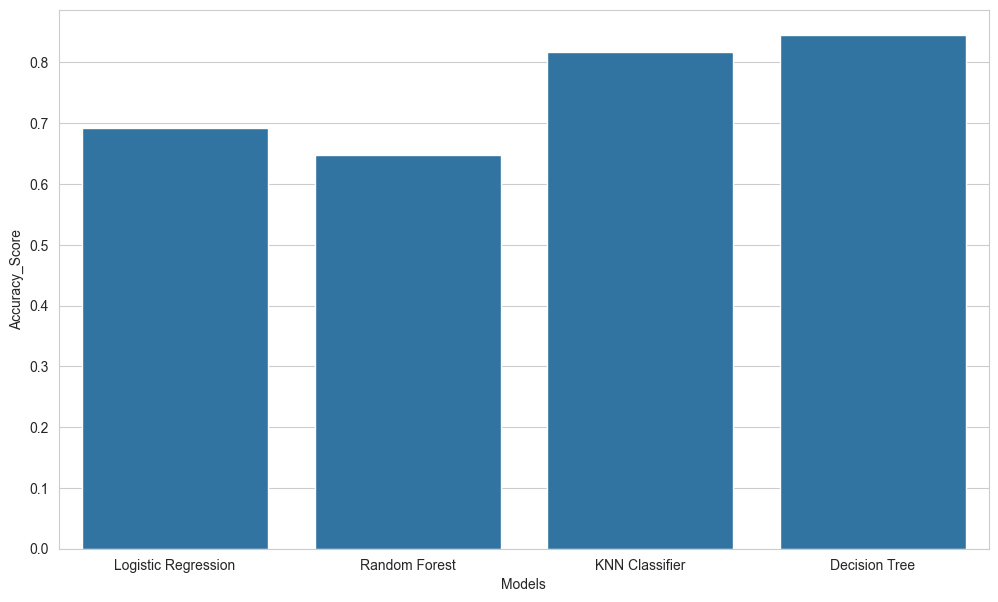

In [150]:
#Accuracy comparision graph.
plt.figure(figsize=(12,7))
sns.barplot(x = 'Models' , y = 'Accuracy_Score' , data = accuracy_score_df )

In [20]:
import pickle

model = 'rf_accuracy_score'
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [21]:
with open('final_model.pkl','rb') as f:
    model = pickle.load(f)

In [24]:
model1 = 'data'
with open ('data.pkl', 'wb') as f:
    pickle.dump(model1, f)